In [1]:
import pandas as pd
from utils.data_prep_utils import *
from transformers.encoder import *
from transformers.binner import *
from transformers.standardizer import *
from model_binclass import dt_binclass, gb_binclass, gnb_binclass, knn_binclass, lgbm_binclass, logreg_binclass, rf_binclass, xgboost_binclass

In [2]:
df = pd.read_csv(r'resources/Machine failure.csv')
df = df.drop(['TWF','HDF','PWF', 'OSF', 'RNF', 'UDI', 'Product ID'], axis=1)
target = df.columns[-1]
features = df.columns.drop(target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [3]:
df = data_split_stratified(df, target,  0.2)

encoder_info = learn_encoder(df[df.dataset==1].drop(columns=['dataset', target]))
df = apply_encoder(df, encoder_info, columns_to_drop=['dataset', target])

stand_info = learn_standardizer(df[df.dataset==1].drop(columns=['dataset', target]))
df = apply_standardizer(df, stand_info, columns_to_drop=['dataset', target])

features = df.columns.drop(target)

print(f"y_train - 0: {sum((df.dataset == 1) & (df[target] == 0))}, 1: {sum((df.dataset == 1) & (df[target] == 1))}")
print(f"y_test  - 0: {sum((df.dataset == 0) & (df[target] == 0))}, 1: {sum((df.dataset == 0) & (df[target] == 1))}")

y_train - 0: 7729, 1: 271
y_test  - 0: 1932, 1: 68


ML

In [ ]:
train_set = df[df.dataset == 1]
test_set = df[df.dataset == 0]
X_train = train_set.drop(columns=[target, 'dataset'])
X_test = test_set.drop(columns=[target, 'dataset'])
X_train

,cat__Type_L,cat__Type_M,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
0,0.0,1.0,-0.944879,-0.935190,0.144908,0.294860,-1.708395
2,1.0,0.0,-0.944879,-1.001821,-0.188851,0.970840,-1.630039
3,1.0,0.0,-0.895223,-0.935190,-0.614673,-0.043130,-1.598697
6,1.0,0.0,-0.944879,-0.935190,0.188135,0.253892,-1.488999
7,1.0,0.0,-0.944879,-0.935190,-0.004793,0.028565,-1.457656
...,...,...,...,...,...,...,...
9994,1.0,0.0,-0.597287,-1.135082,0.645345,-1.231214,-1.520341
9995,0.0,1.0,-0.597287,-1.068451,0.467458,-1.067341,-1.488999
9996,0.0,0.0,-0.547631,-1.068451,0.633588,-0.831772,-1.441985
9998,0.0,0.0,-0.497975,-0.868560,-0.783612,0.878661,-1.316616


In [5]:
X_test

,cat__Type_L,cat__Type_M,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
1,1.0,0.0,-0.895223,-0.868560,-0.783612,0.653334,-1.661382
4,1.0,0.0,-0.895223,-0.868560,-0.783612,0.008081,-1.567355
5,0.0,1.0,-0.944879,-0.935190,-0.668411,0.202681,-1.536012
9,0.0,1.0,-0.746255,-0.668669,1.254256,-1.220972,-1.379300
11,0.0,0.0,-0.696599,-0.602039,-0.681892,0.448492,-1.253931
...,...,...,...,...,...,...,...
9981,1.0,0.0,-0.646943,-1.001821,-1.166079,0.725029,1.269132
9982,0.0,1.0,-0.646943,-1.068451,-0.131351,0.591881,1.300474
9986,0.0,1.0,-0.597287,-0.935190,-0.131351,0.243650,1.535542
9987,0.0,1.0,-0.597287,-0.935190,-0.176044,-0.288940,1.582556


Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       0.97      0.95      0.96       271

    accuracy                           1.00      8000
   macro avg       0.99      0.98      0.98      8000
weighted avg       1.00      1.00      1.00      8000



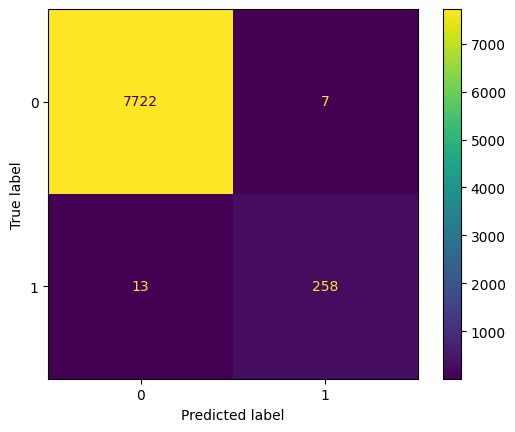


═══ Probability Metrics ═══
ROC AUC: 0.9999
Average Precision: 0.9957


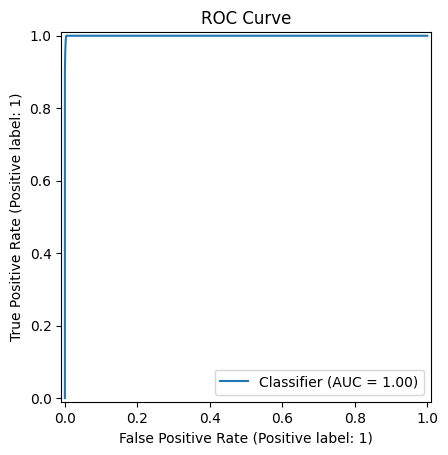

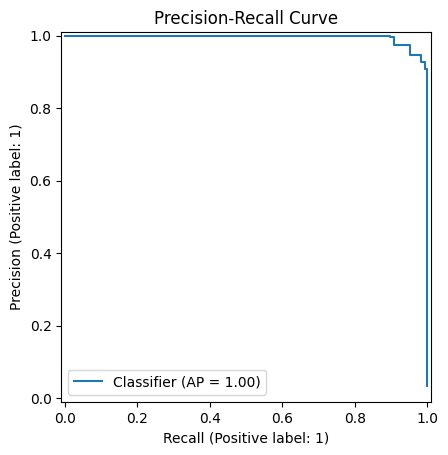

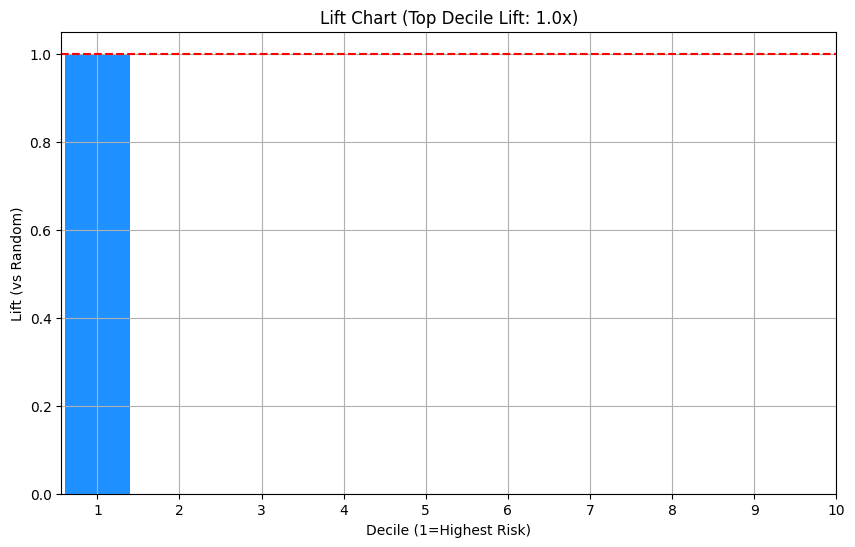

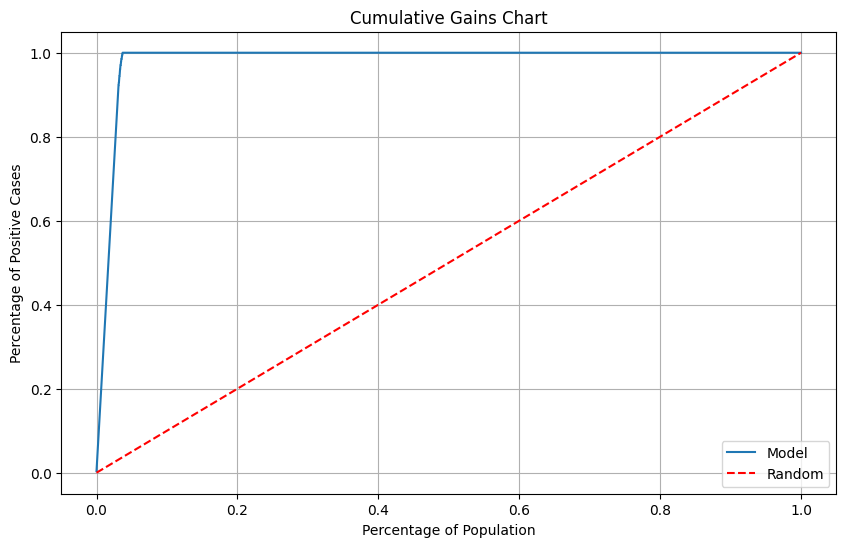

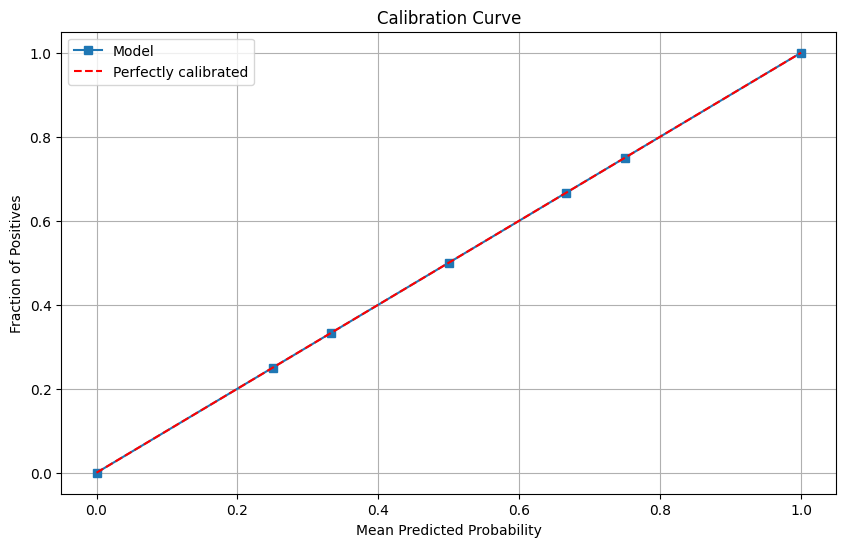


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.63      0.62      0.62        68

    accuracy                           0.97      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.97      0.97      0.97      2000



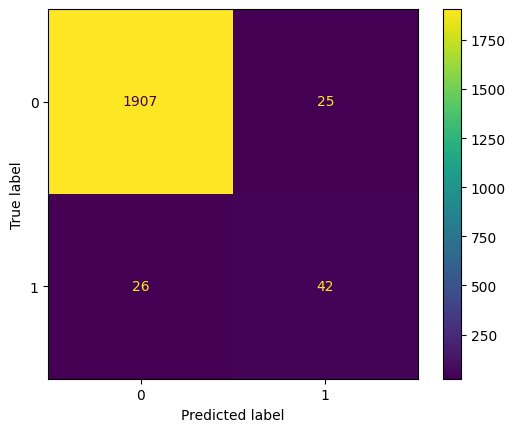


═══ Probability Metrics ═══
ROC AUC: 0.8172
Average Precision: 0.4446


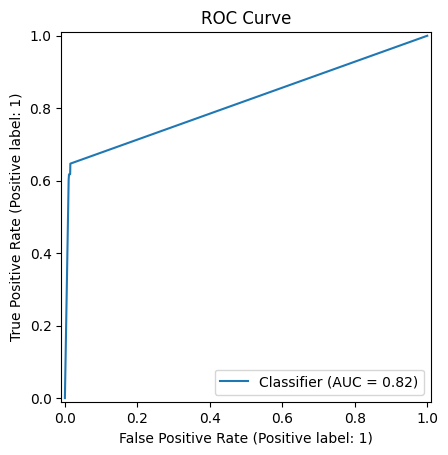

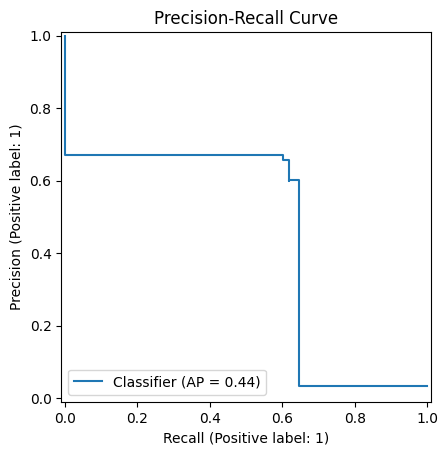

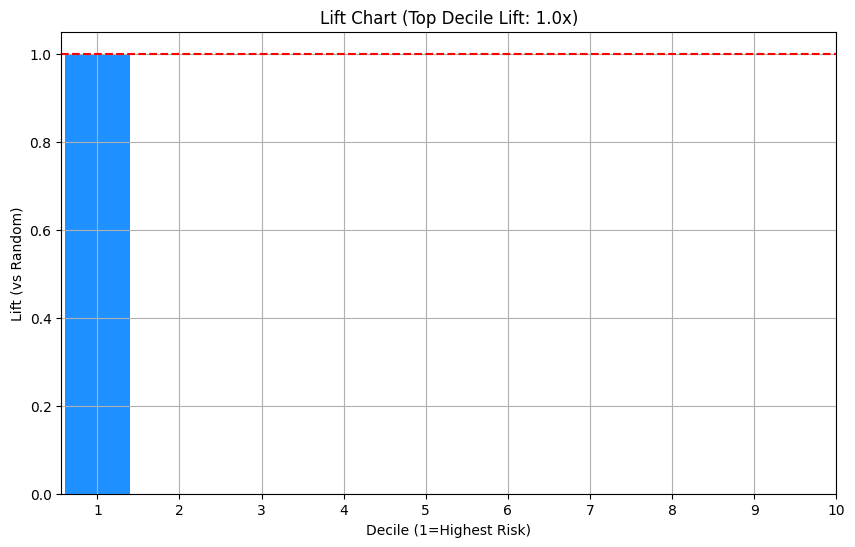

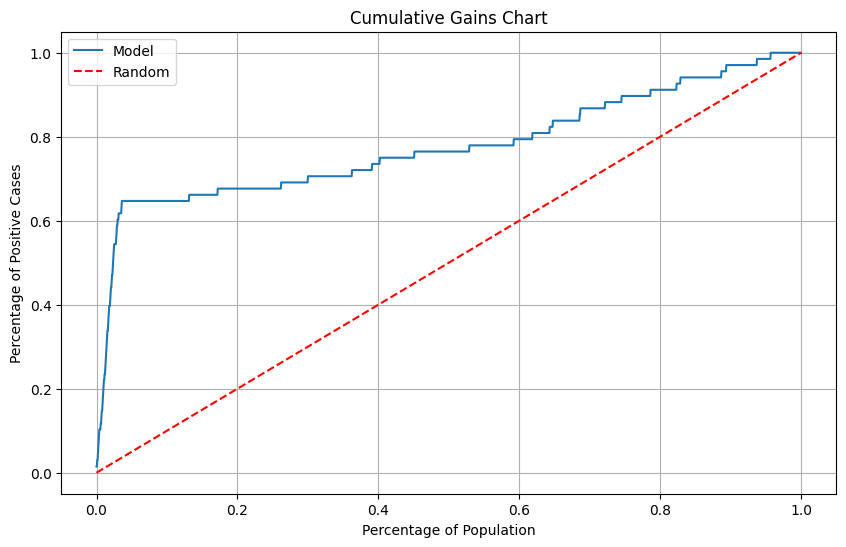

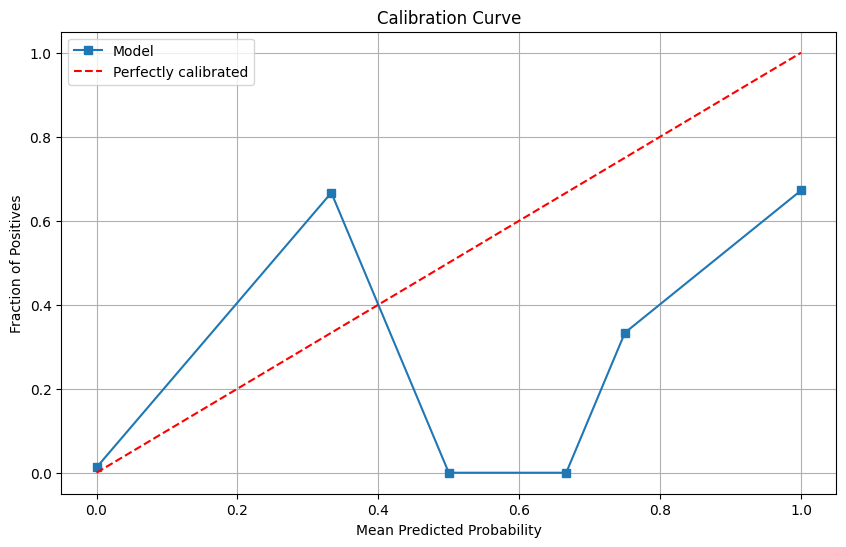

In [ ]:
#DecisionTree
DecisionTreeBinClass = dt_binclass.DecisionTreeBinClass
model = DecisionTreeBinClass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7729
           1       0.71      0.16      0.26       271

    accuracy                           0.97      8000
   macro avg       0.84      0.58      0.62      8000
weighted avg       0.96      0.97      0.96      8000



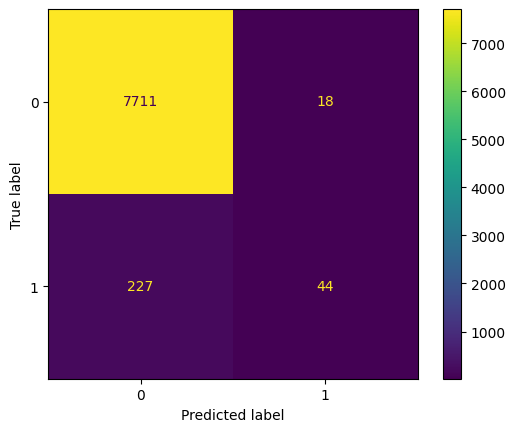


═══ Probability Metrics ═══
ROC AUC: 0.8805
Average Precision: 0.4082


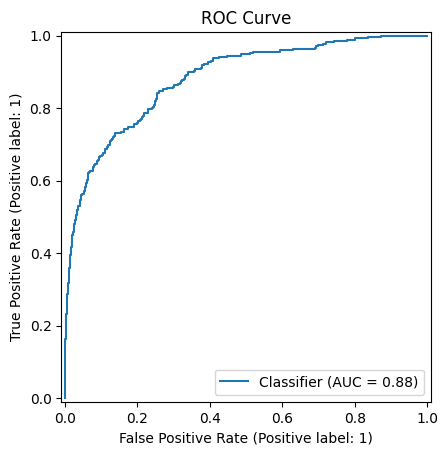

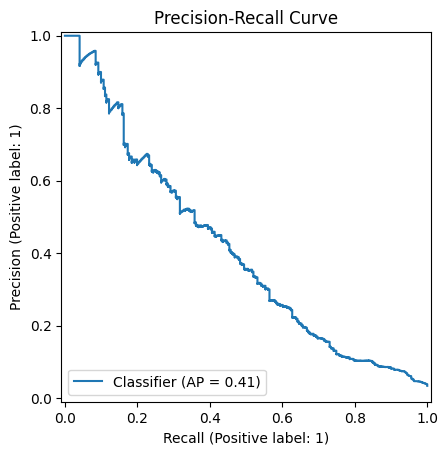

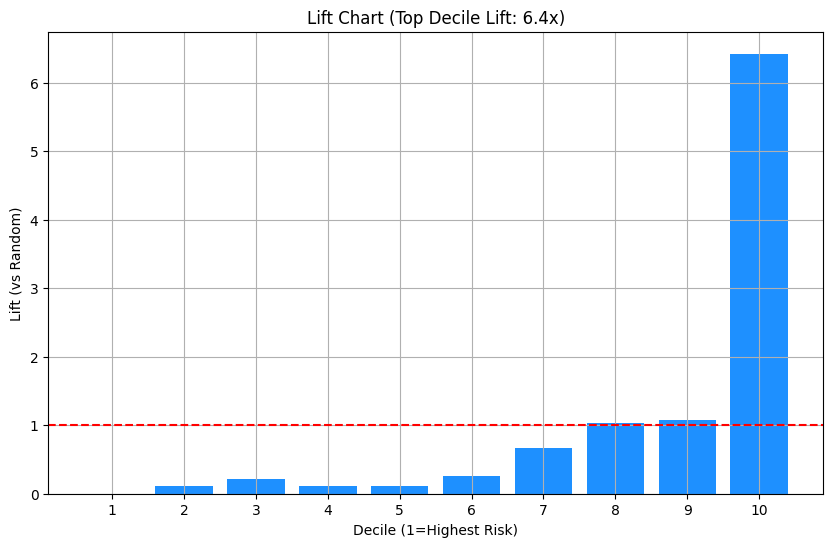

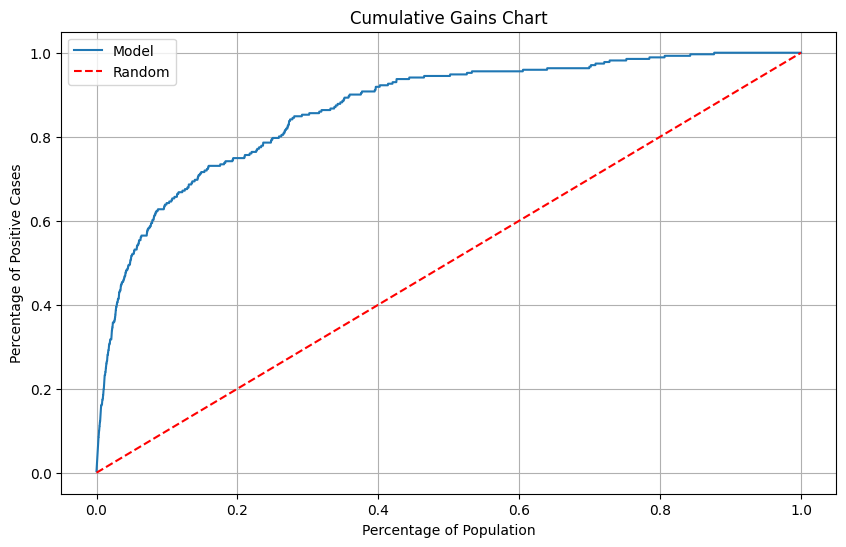

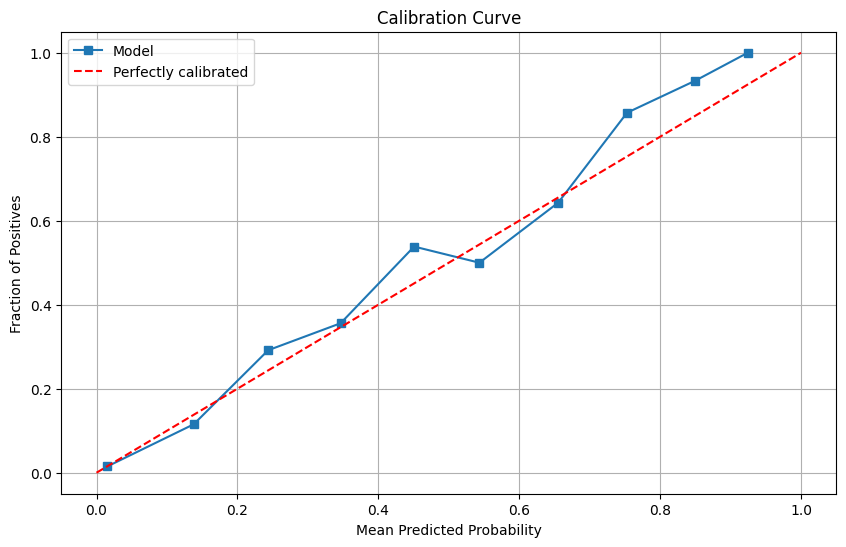


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1932
           1       0.16      0.74      0.26        68

    accuracy                           0.85      2000
   macro avg       0.57      0.80      0.59      2000
weighted avg       0.96      0.85      0.90      2000



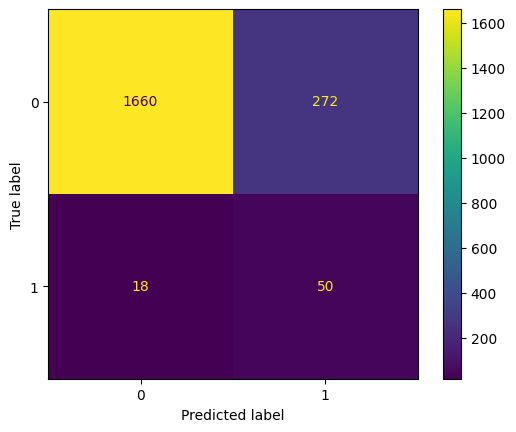


═══ Probability Metrics ═══
ROC AUC: 0.8830
Average Precision: 0.3704


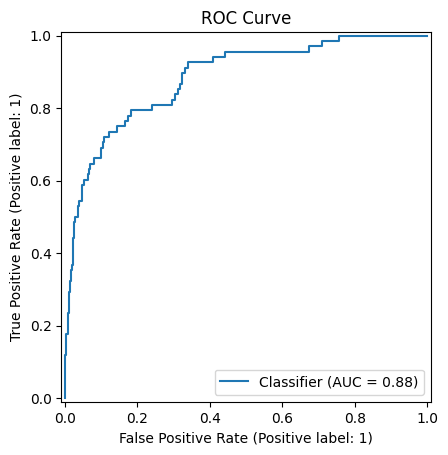

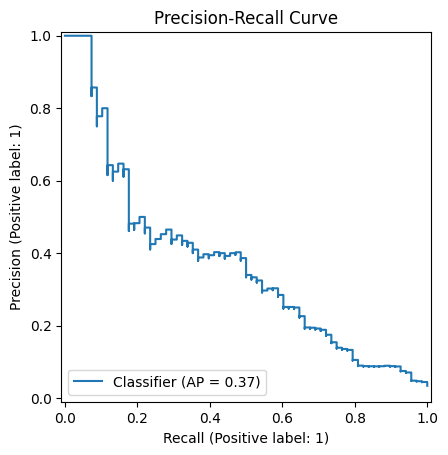

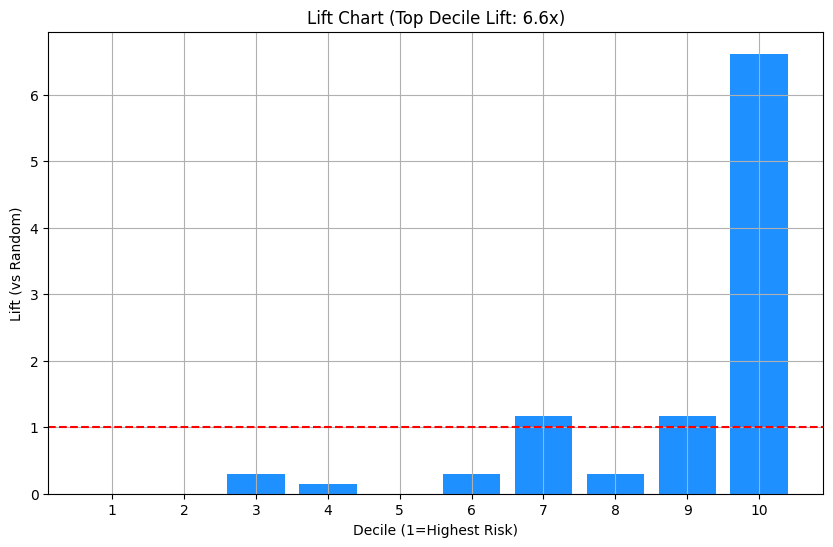

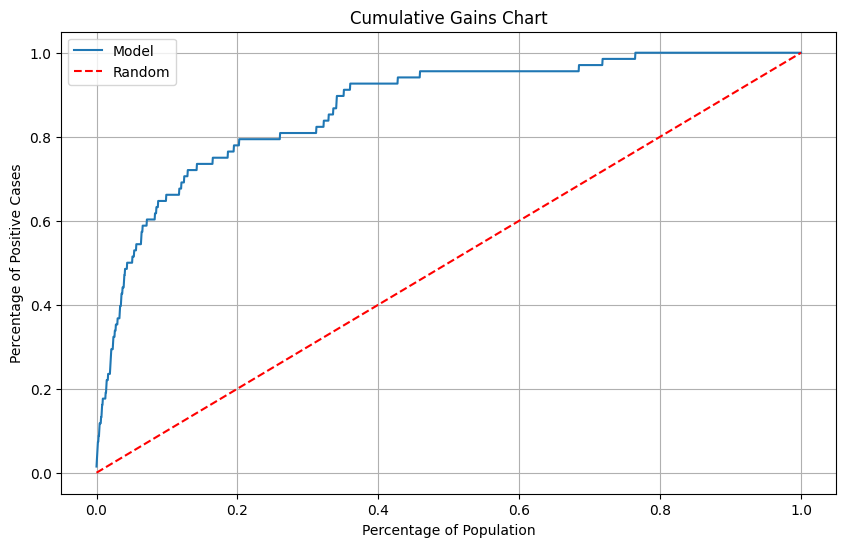

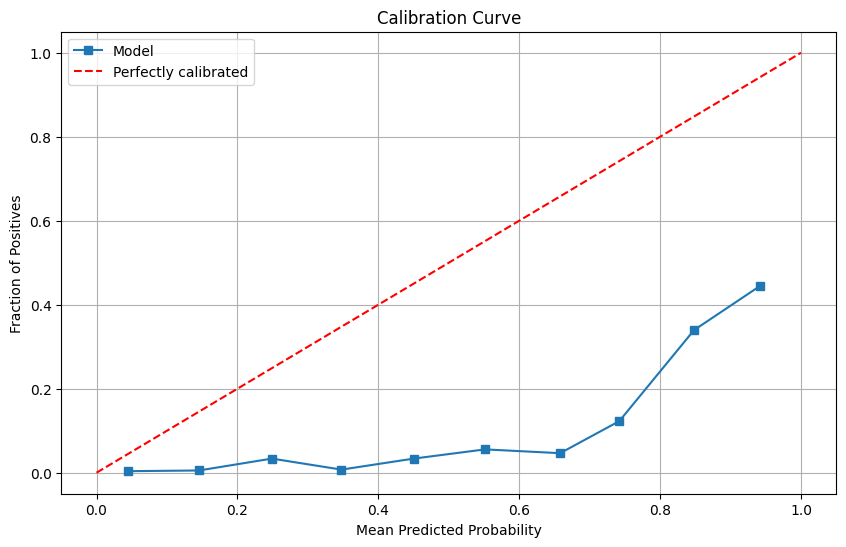

In [8]:
#LogisticRegression
LogregBinClass = logreg_binclass.LogregBinClass
model = LogregBinClass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      0.89      0.94       271

    accuracy                           1.00      8000
   macro avg       1.00      0.94      0.97      8000
weighted avg       1.00      1.00      1.00      8000



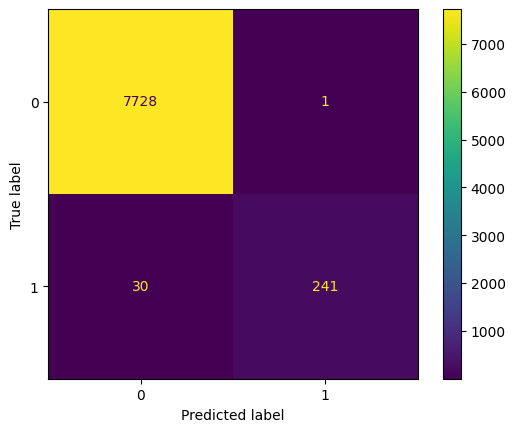


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 0.9990


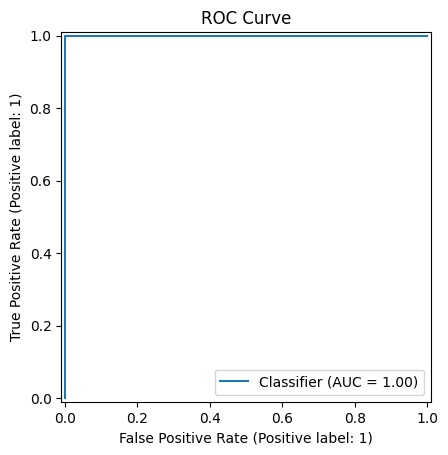

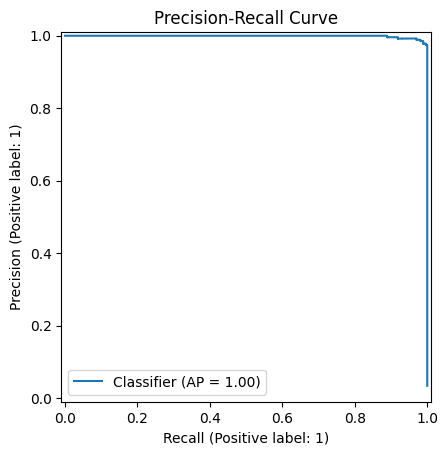

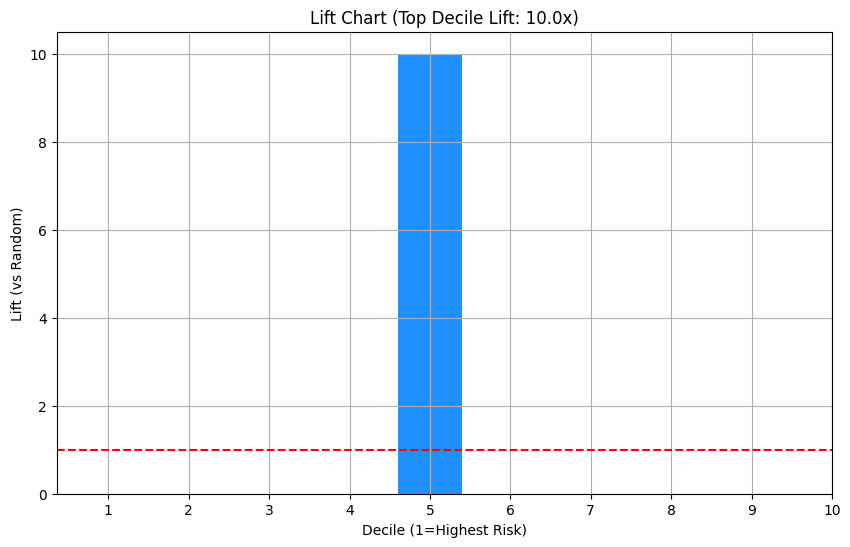

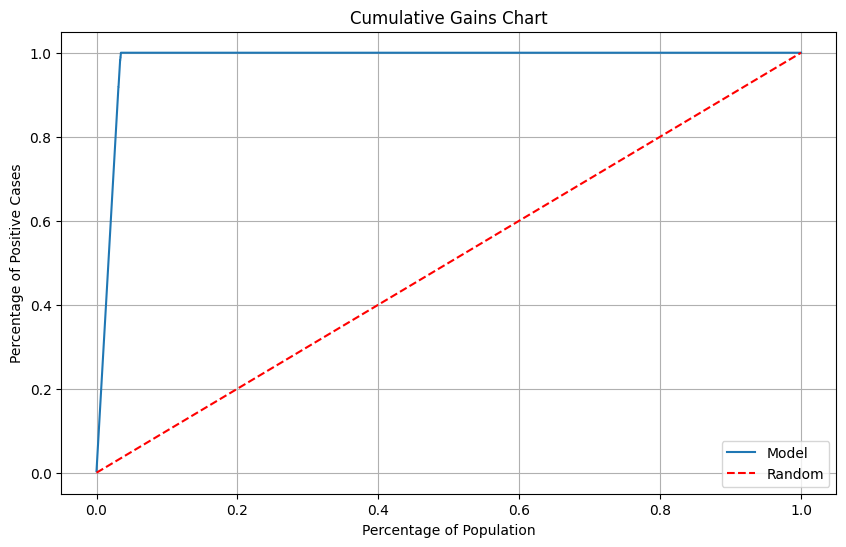

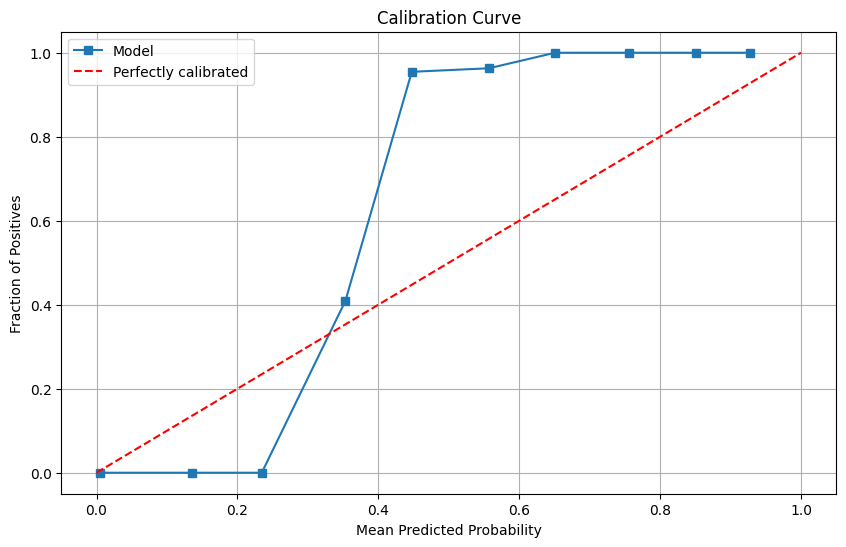


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.86      0.53      0.65        68

    accuracy                           0.98      2000
   macro avg       0.92      0.76      0.82      2000
weighted avg       0.98      0.98      0.98      2000



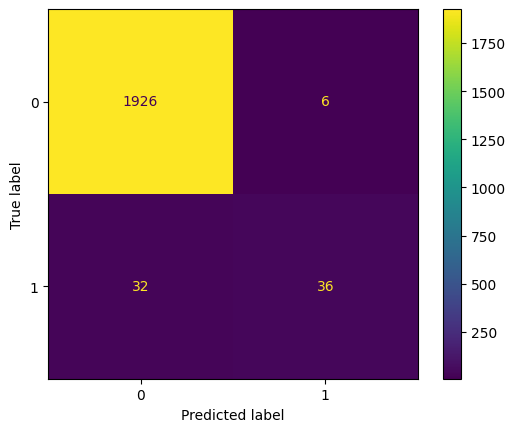


═══ Probability Metrics ═══
ROC AUC: 0.9627
Average Precision: 0.7820


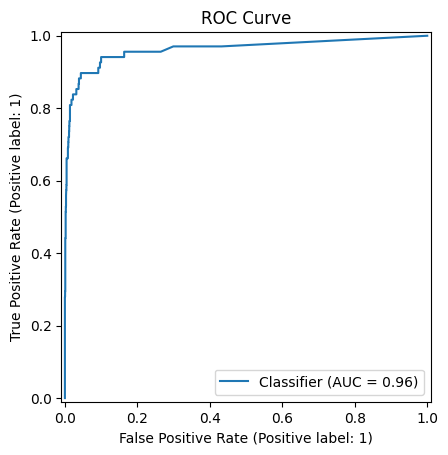

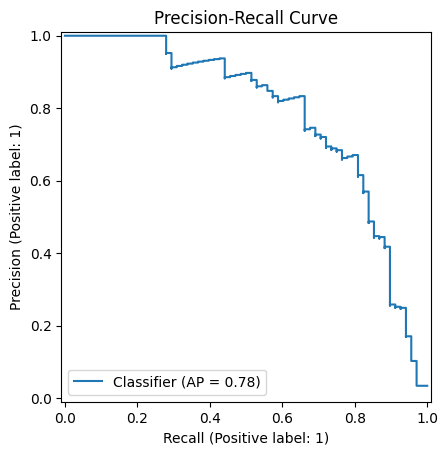

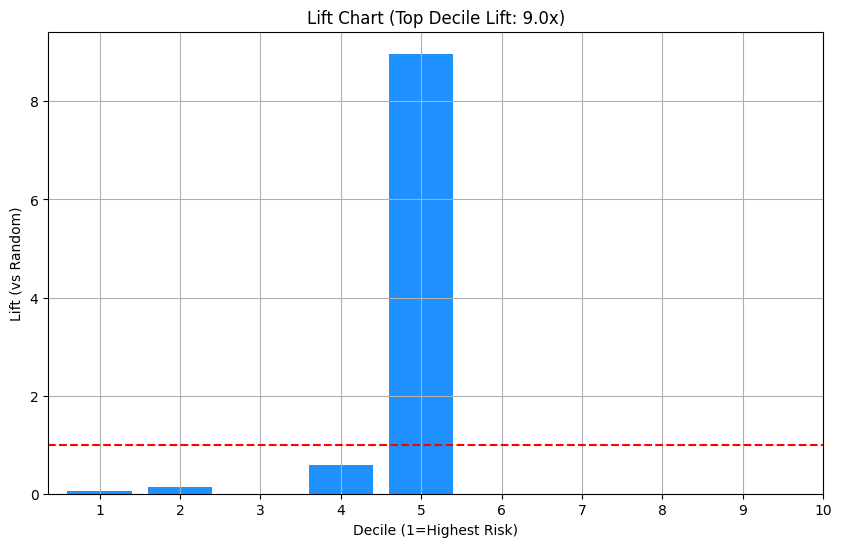

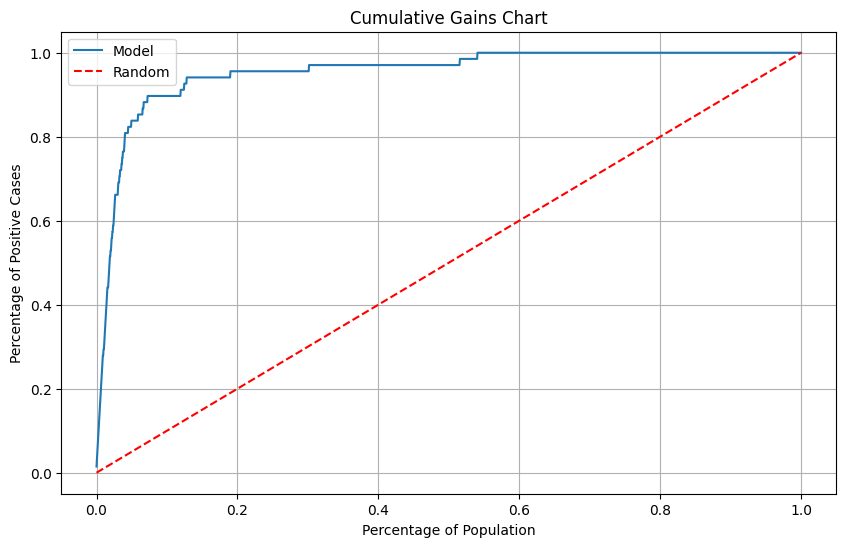

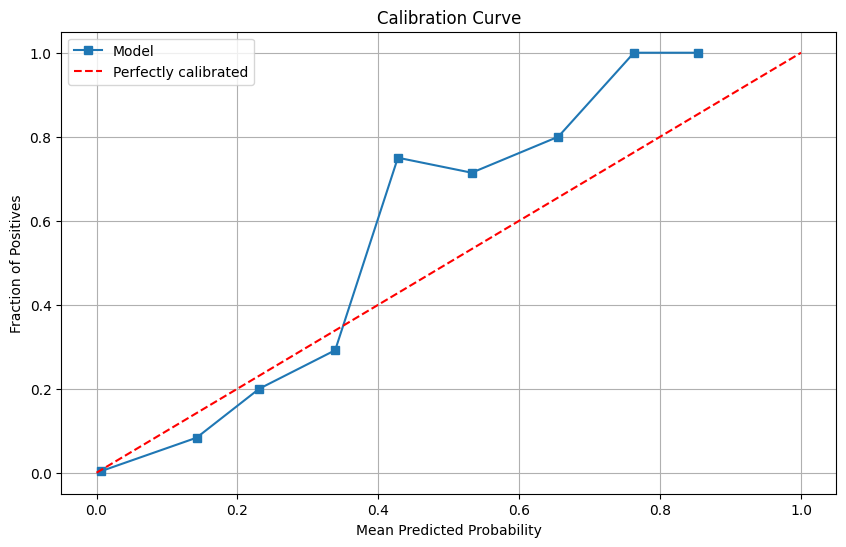

In [9]:
#RandomForest
RandomForestBinClass = rf_binclass.RandomForestBinClass
model = RandomForestBinClass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

###GradientBoosting

Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7729
           1       0.96      0.79      0.87       271

    accuracy                           0.99      8000
   macro avg       0.98      0.89      0.93      8000
weighted avg       0.99      0.99      0.99      8000



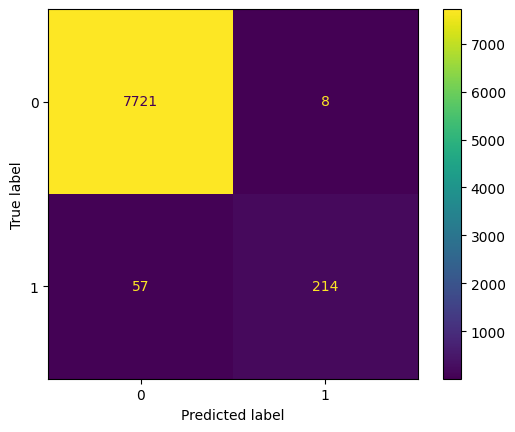


═══ Probability Metrics ═══
ROC AUC: 0.9884
Average Precision: 0.9231


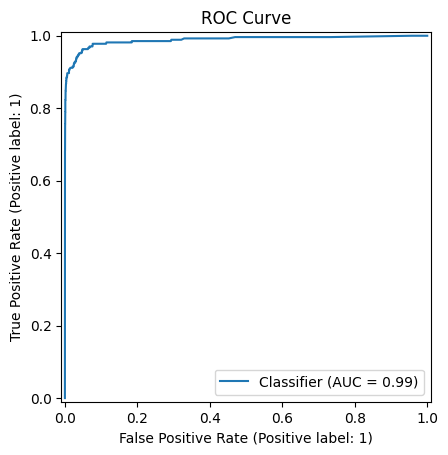

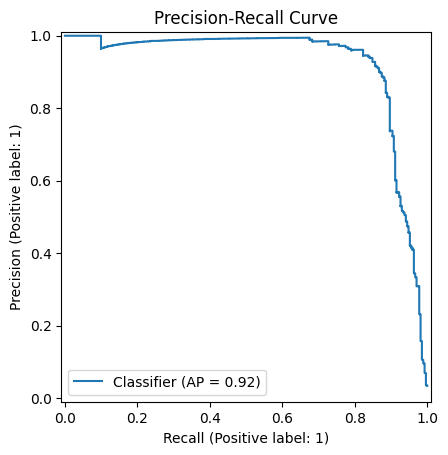

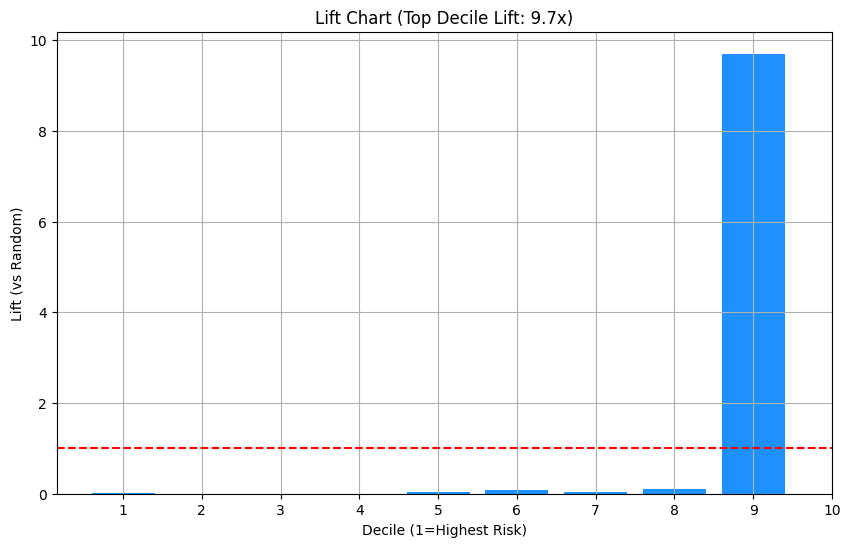

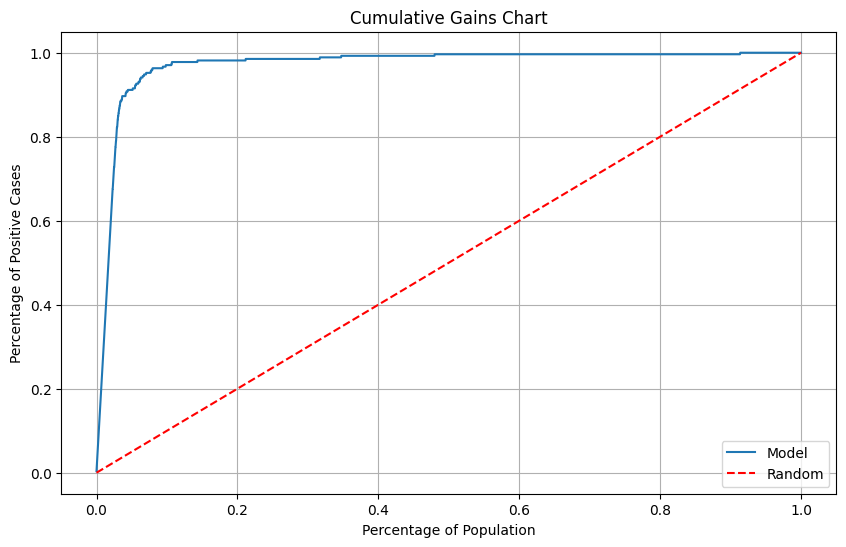

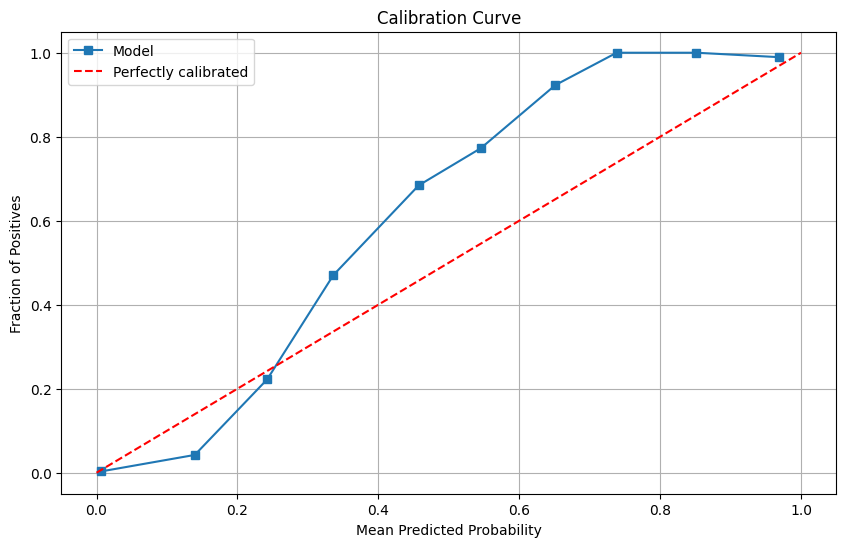


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.87      0.69      0.77        68

    accuracy                           0.99      2000
   macro avg       0.93      0.84      0.88      2000
weighted avg       0.99      0.99      0.99      2000



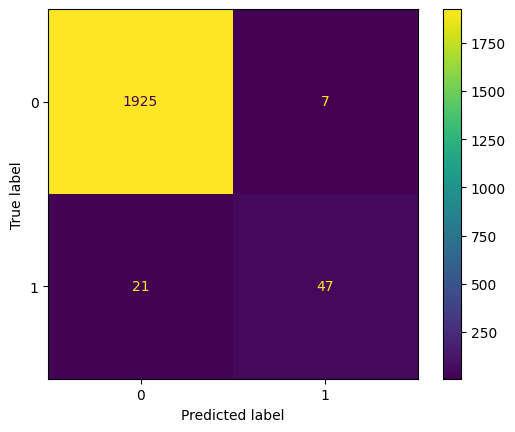


═══ Probability Metrics ═══
ROC AUC: 0.9666
Average Precision: 0.7783


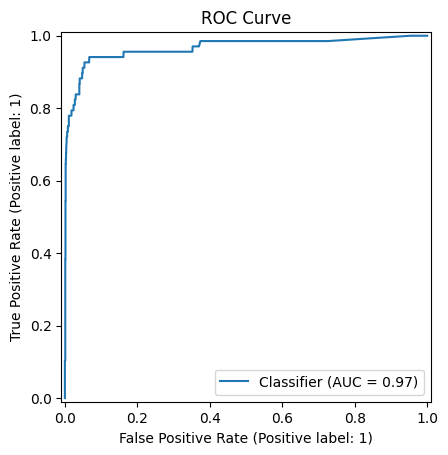

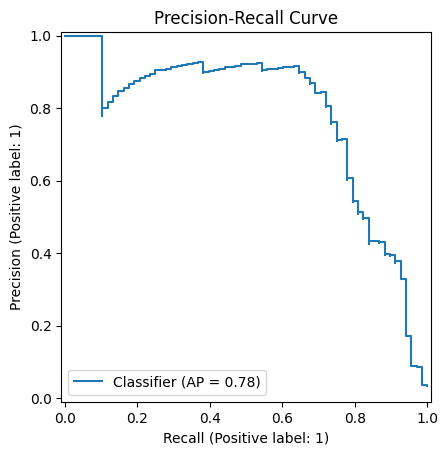

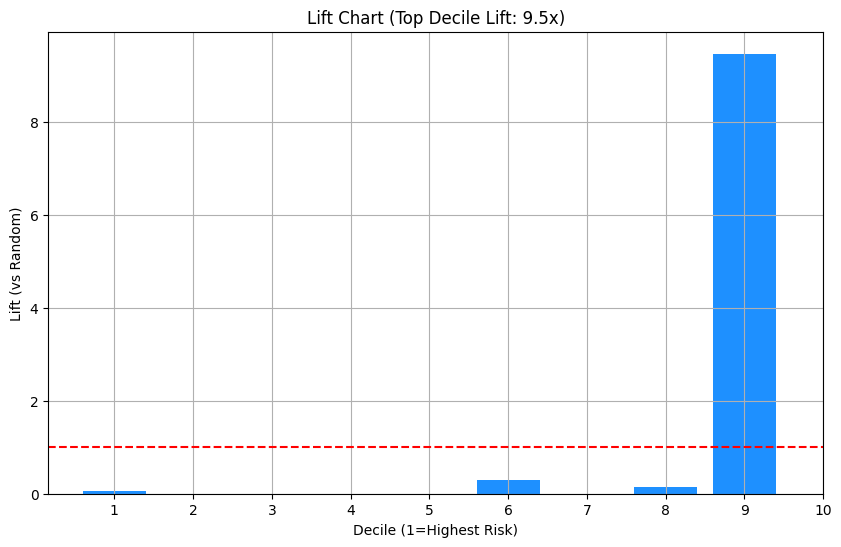

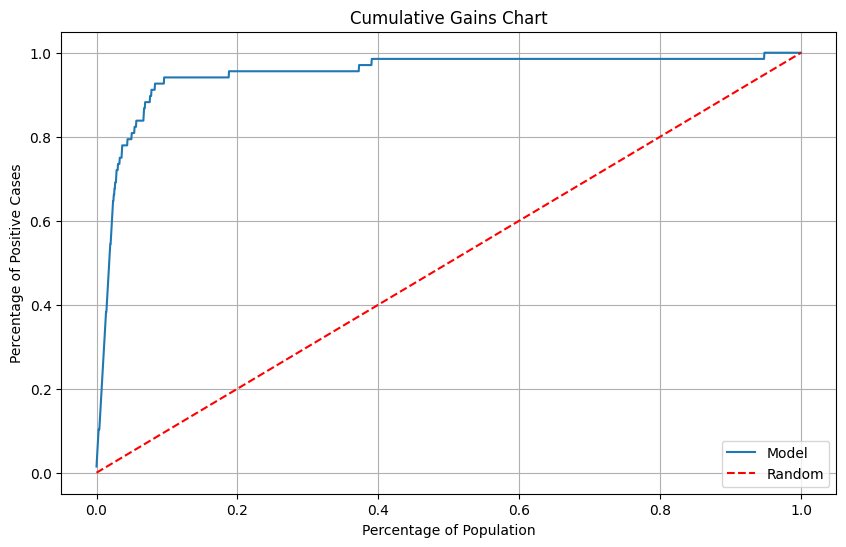

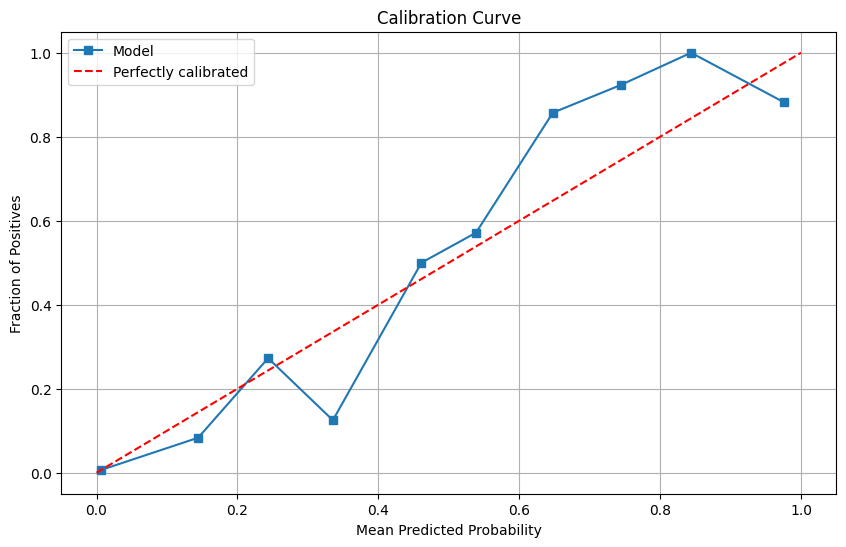

In [10]:
#GradientBoosting
GradientBoostingBinclass = gb_binclass.GradientBoostingBinclass
model = GradientBoostingBinclass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

In [ ]:
#SVM
#model_info = svm_binclass.learn_model(X_train, y_train)
#df_train_predictions = svm_binclass.apply_model(X_train, model_info)
#df_test_predictions = svm_binclass.apply_model(X_test, model_info)

#print("Model Evaluation:")
#svm_binclass.evaluate_model(df_train_predictions, y_train)

#print("Prediction Evaluation:")
#svm_binclass.evaluate_model(df_test_predictions, y_test)

Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7729
           1       0.94      0.58      0.72       271

    accuracy                           0.98      8000
   macro avg       0.96      0.79      0.85      8000
weighted avg       0.98      0.98      0.98      8000



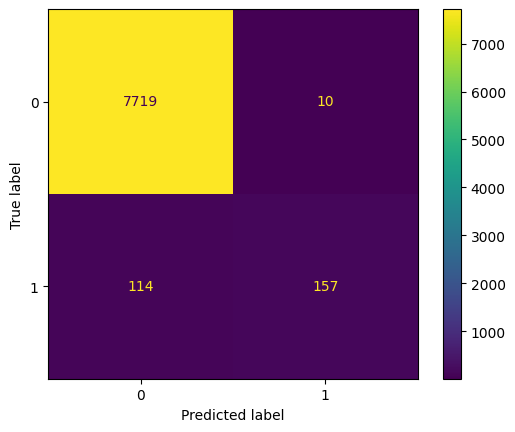


═══ Probability Metrics ═══
ROC AUC: 0.9946
Average Precision: 0.8138


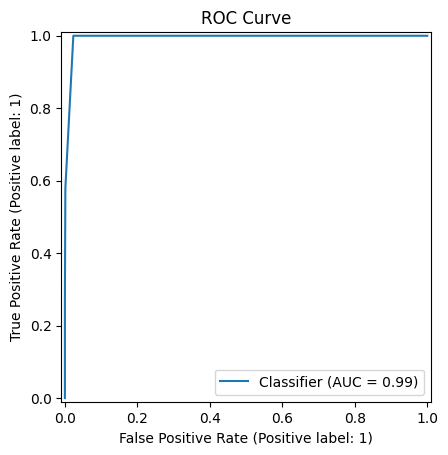

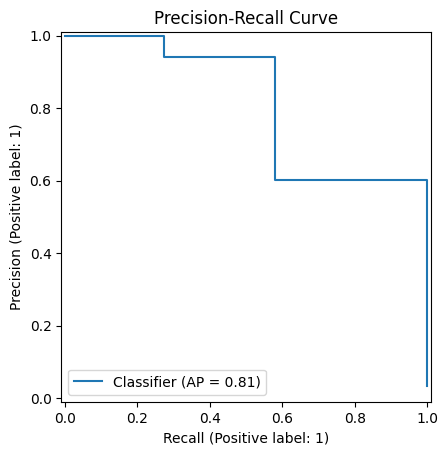

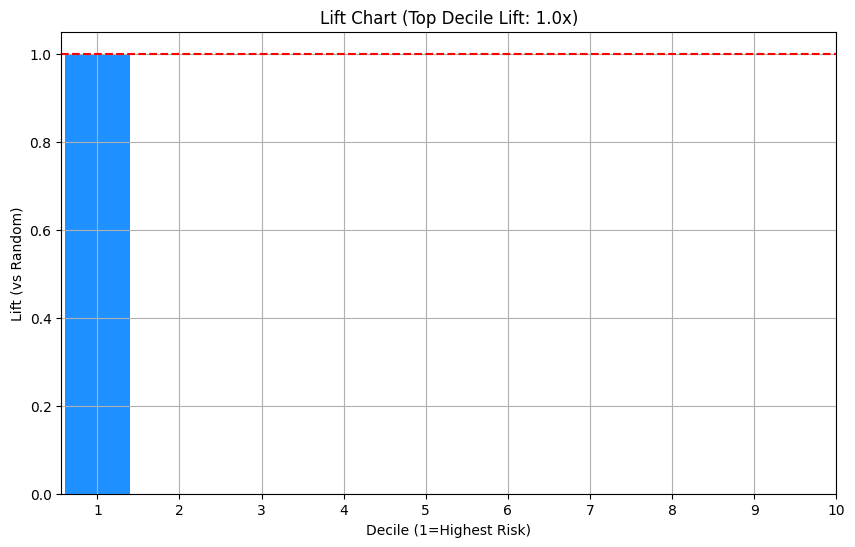

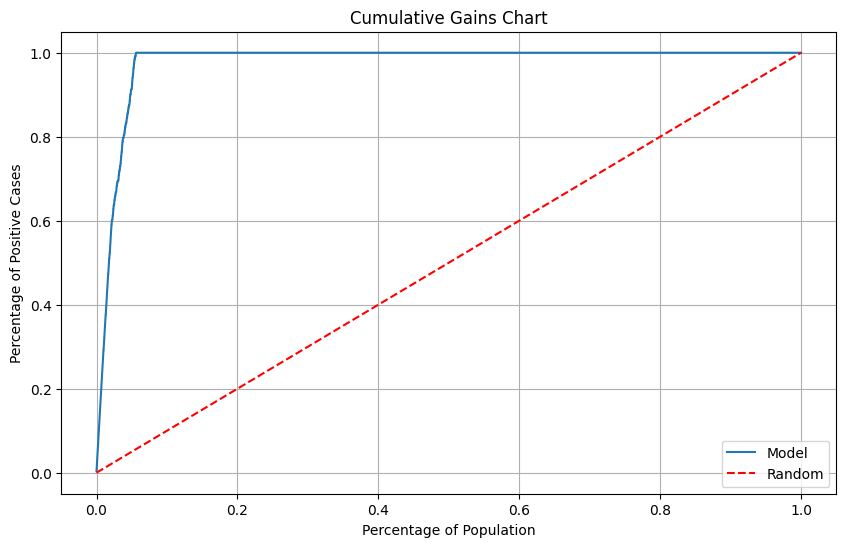

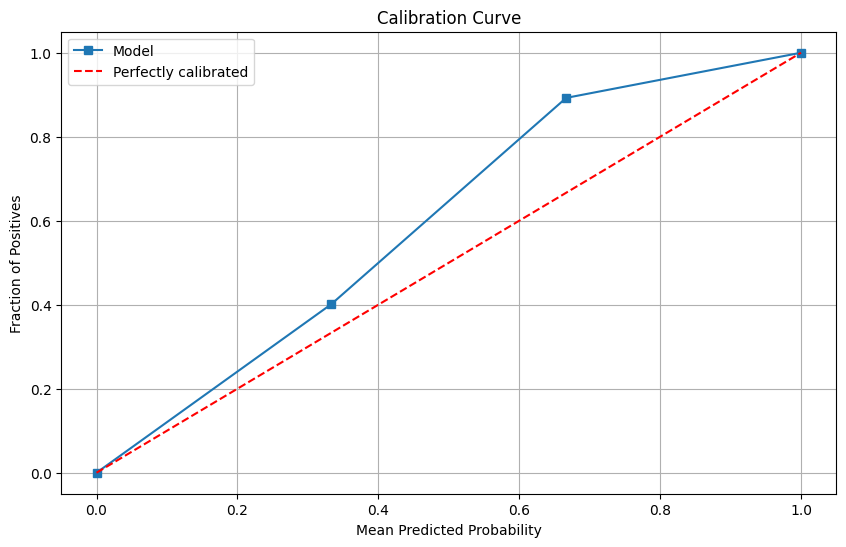


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.65      0.25      0.36        68

    accuracy                           0.97      2000
   macro avg       0.81      0.62      0.67      2000
weighted avg       0.96      0.97      0.96      2000



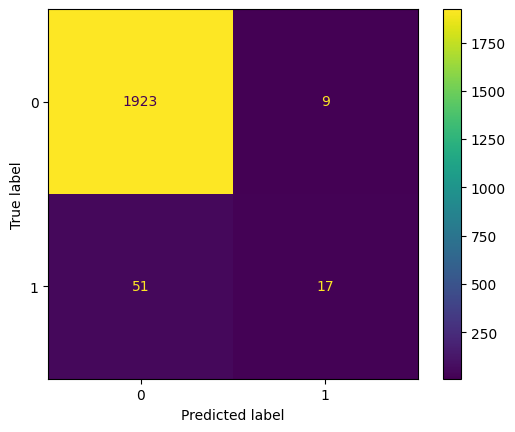


═══ Probability Metrics ═══
ROC AUC: 0.7937
Average Precision: 0.3217


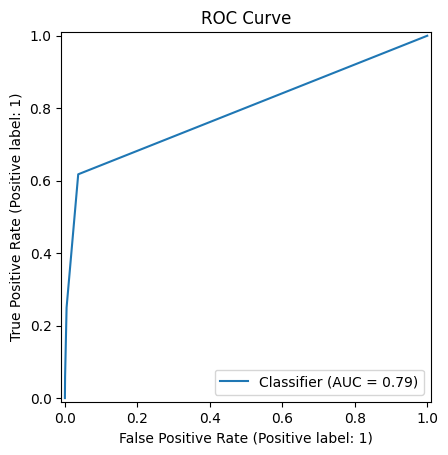

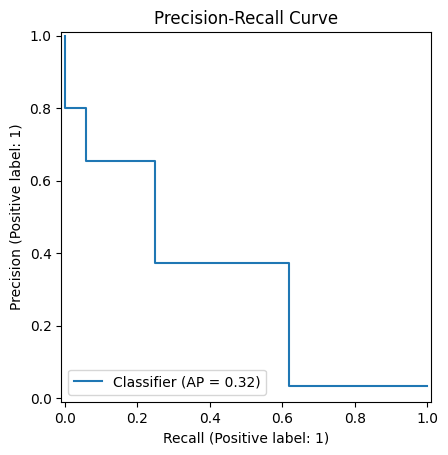

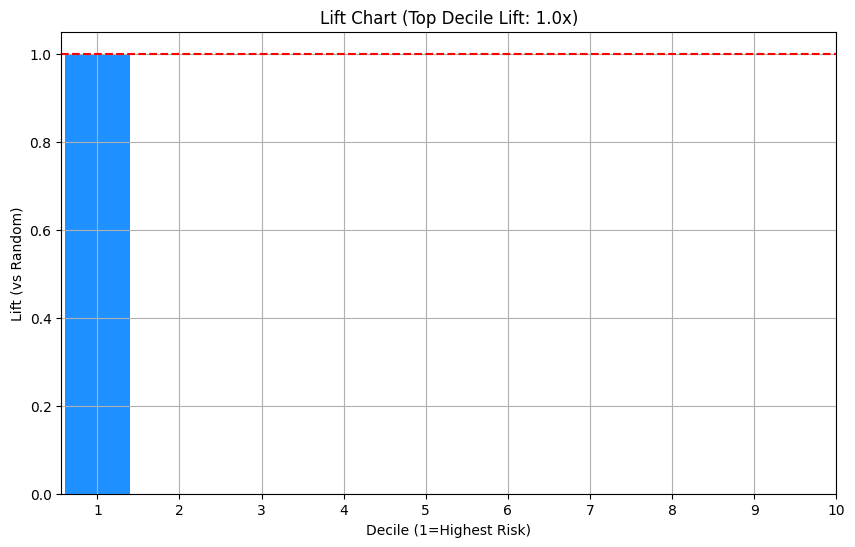

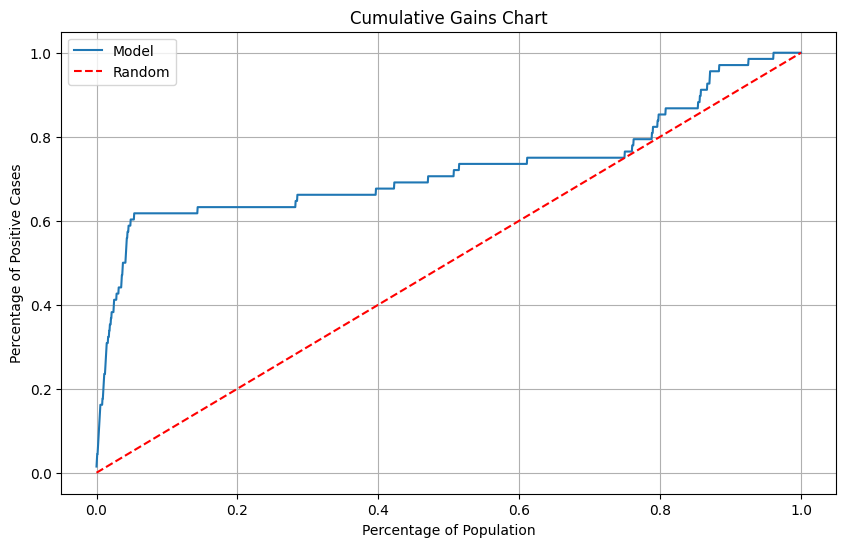

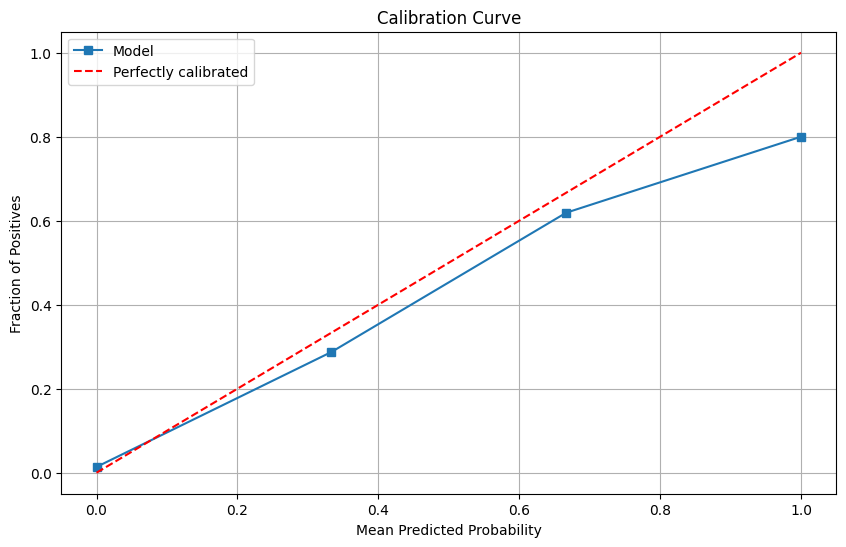

In [11]:
#KNN
KnnBinClass = knn_binclass.KnnBinClass
model = KnnBinClass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7729
           1       0.47      0.24      0.32       271

    accuracy                           0.96      8000
   macro avg       0.72      0.62      0.65      8000
weighted avg       0.96      0.96      0.96      8000



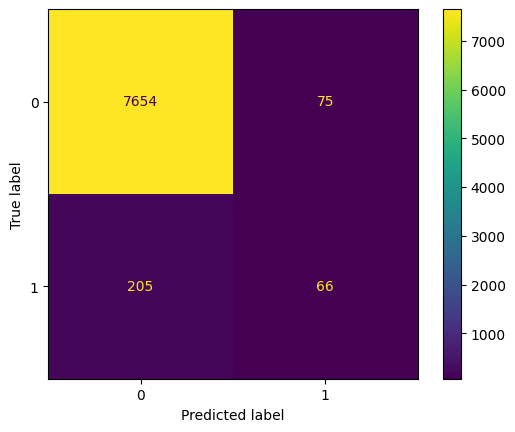


═══ Probability Metrics ═══
ROC AUC: 0.8945
Average Precision: 0.3448


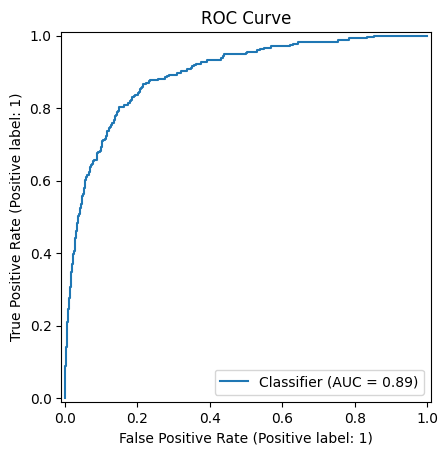

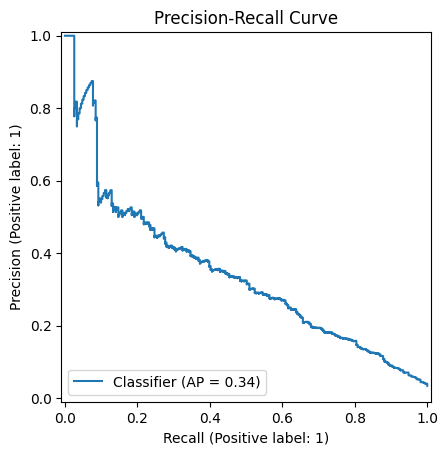

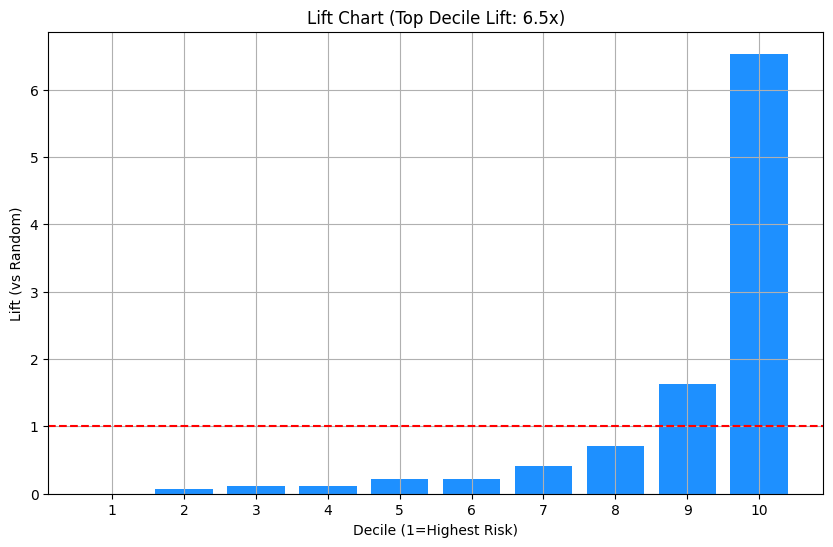

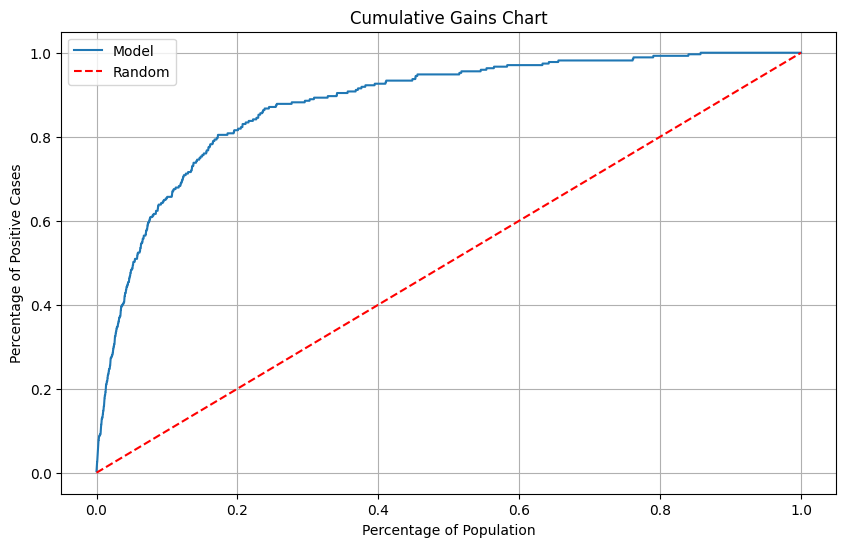

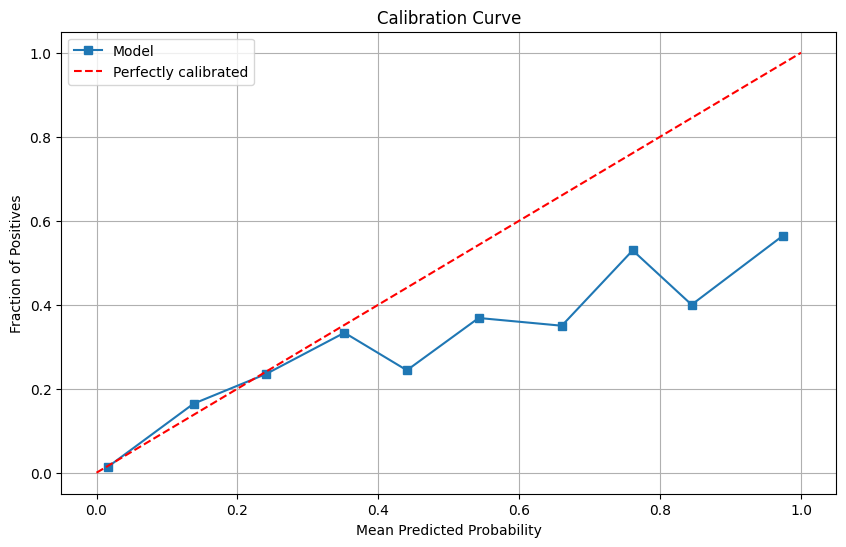


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1932
           1       0.33      0.13      0.19        68

    accuracy                           0.96      2000
   macro avg       0.65      0.56      0.58      2000
weighted avg       0.95      0.96      0.95      2000



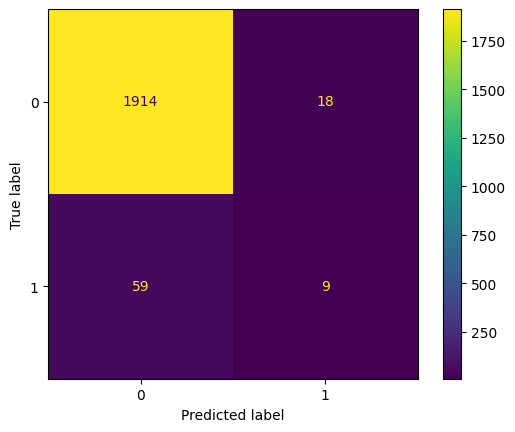


═══ Probability Metrics ═══
ROC AUC: 0.8928
Average Precision: 0.2912


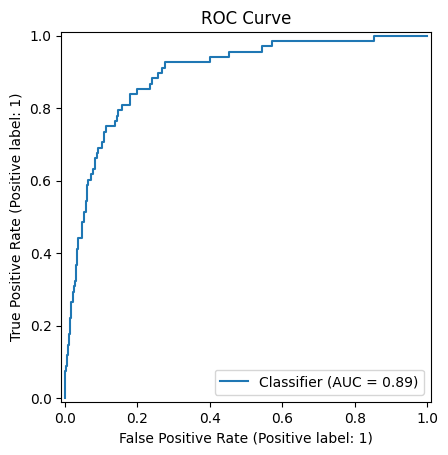

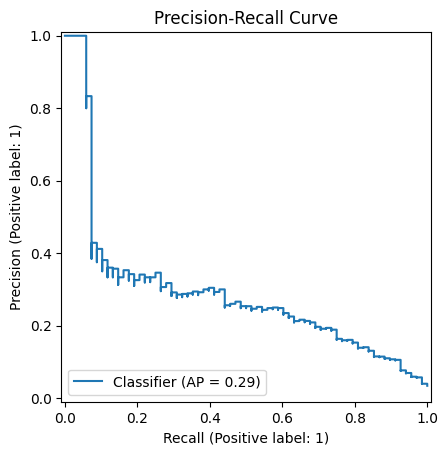

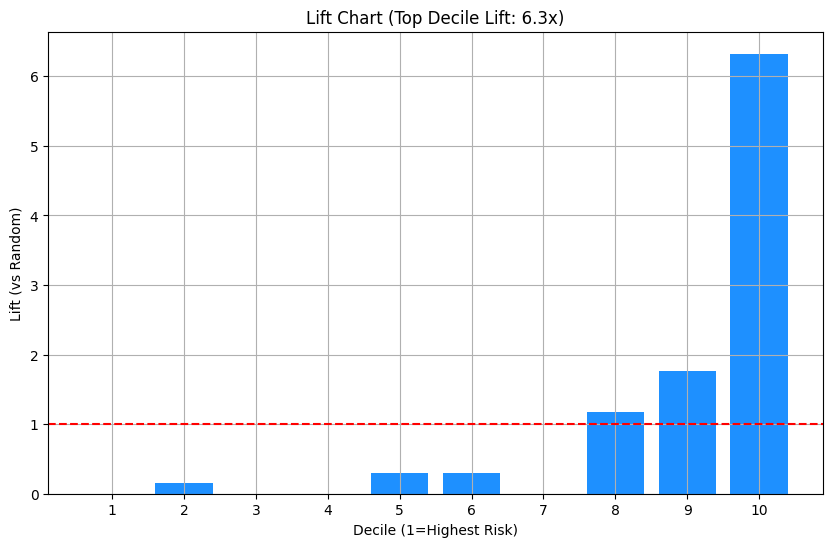

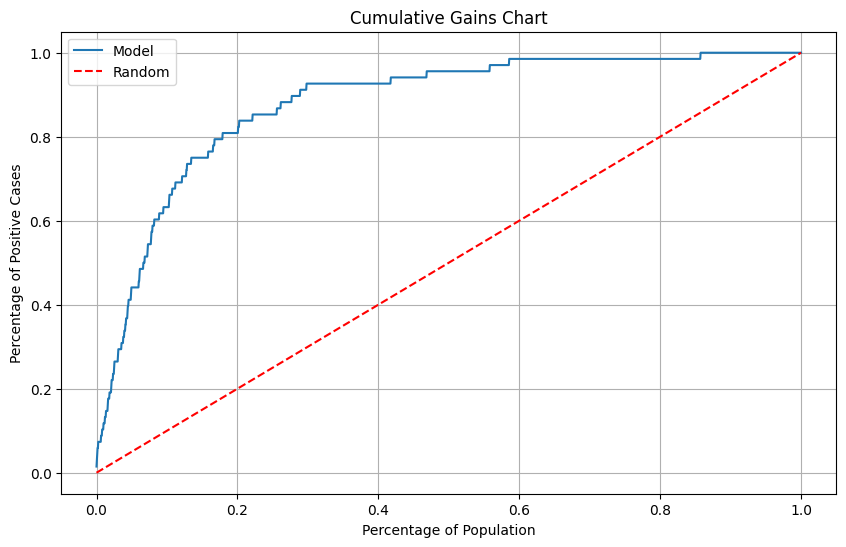

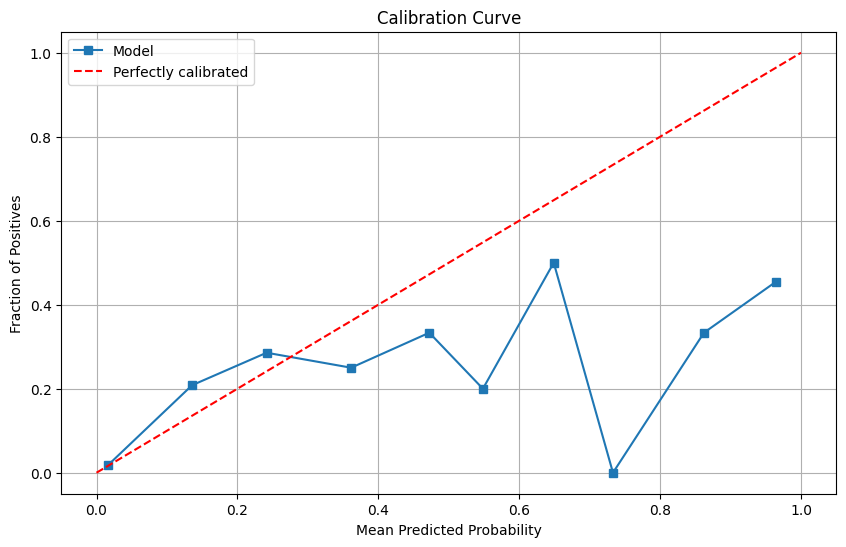

In [12]:
#Gaussian Naive Bayes
GausianNBBinClass = gnb_binclass.GausianNBBinClass
model = GausianNBBinClass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 271, number of negative: 7729
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033875 -> initscore=-3.350616
[LightGBM] [Info] Start training from score -3.350616
Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       0.99      0.96      0.98       271

    accuracy                           1.00      8000
   macro avg       1.00      0.98      0.99      8000
weighted avg       1.00      1.00      1.00      8000



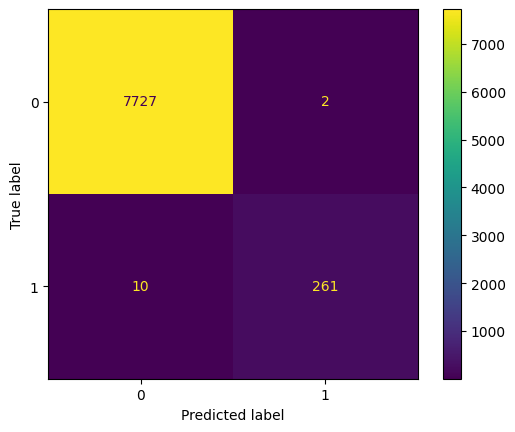


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 0.9993


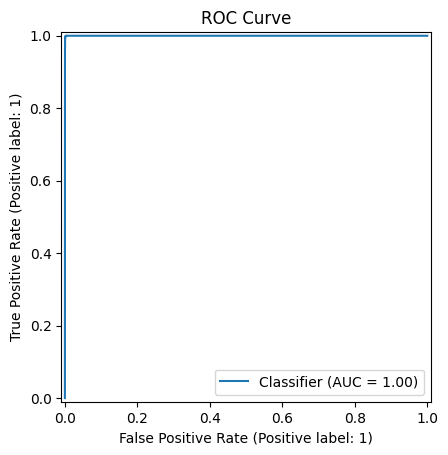

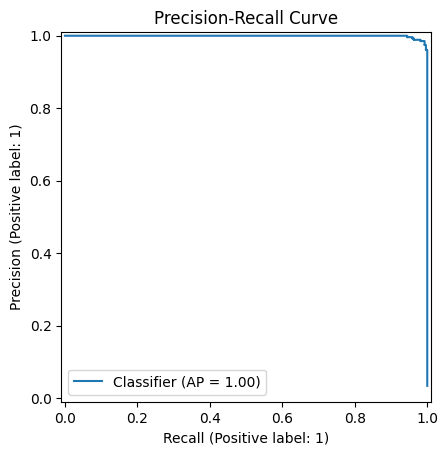

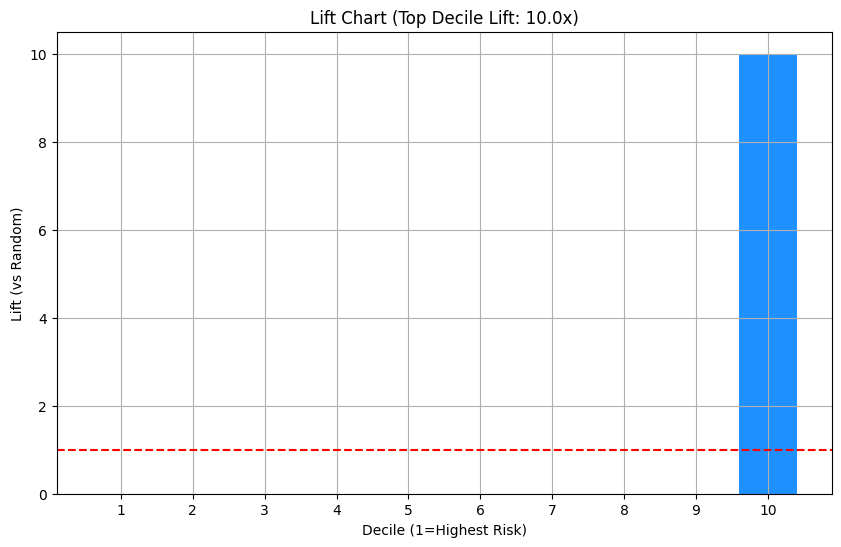

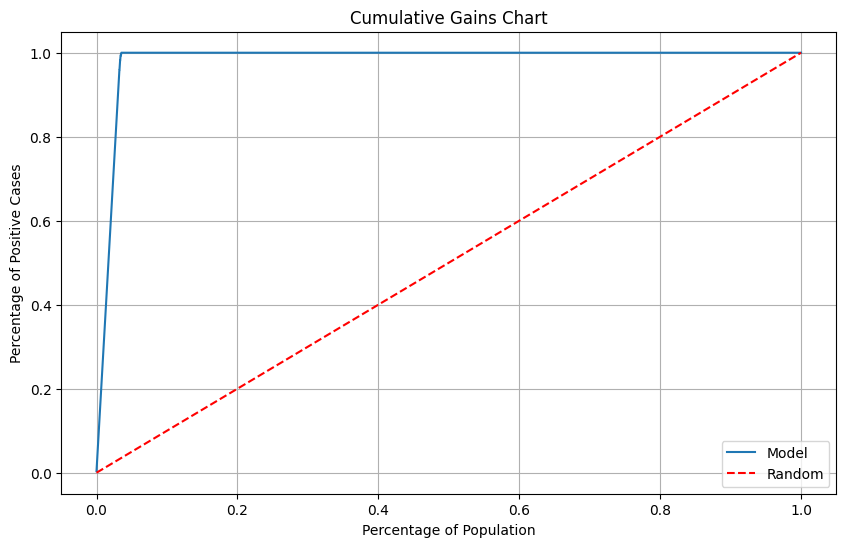

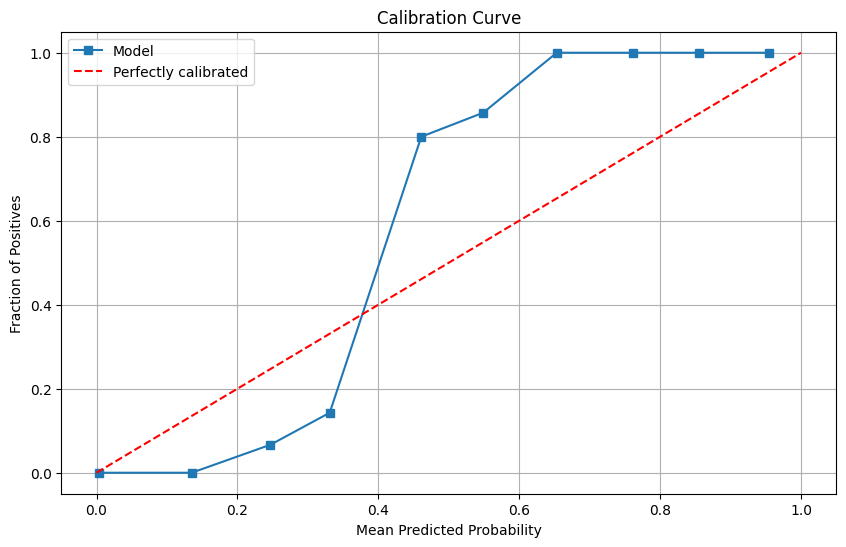


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.92      0.72      0.81        68

    accuracy                           0.99      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.99      0.99      0.99      2000



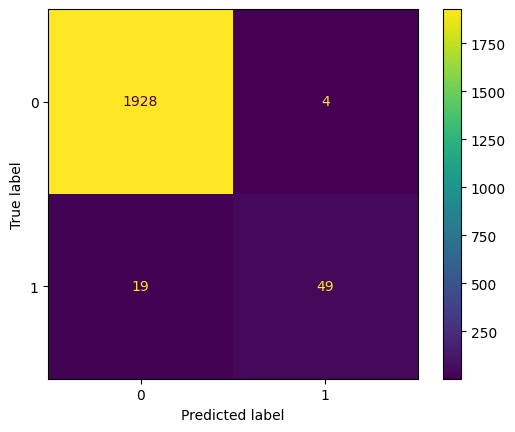


═══ Probability Metrics ═══
ROC AUC: 0.9751
Average Precision: 0.8359


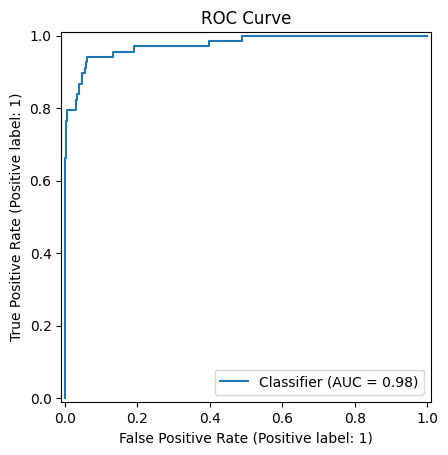

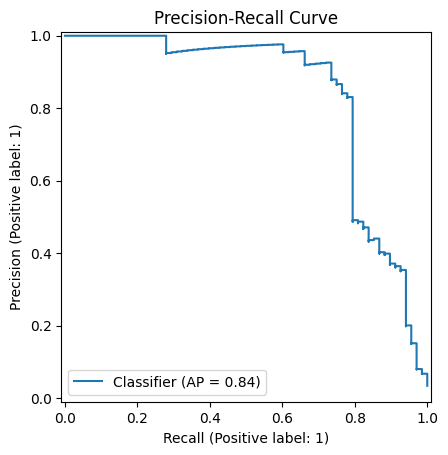

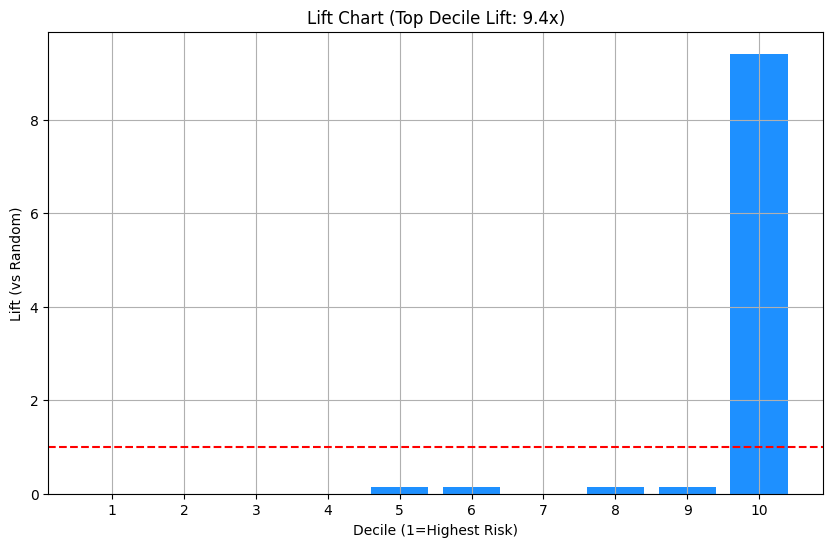

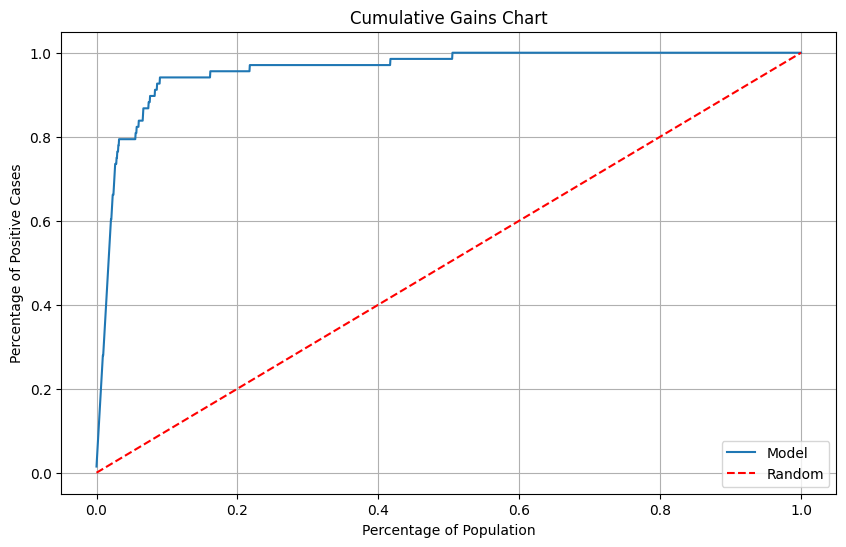

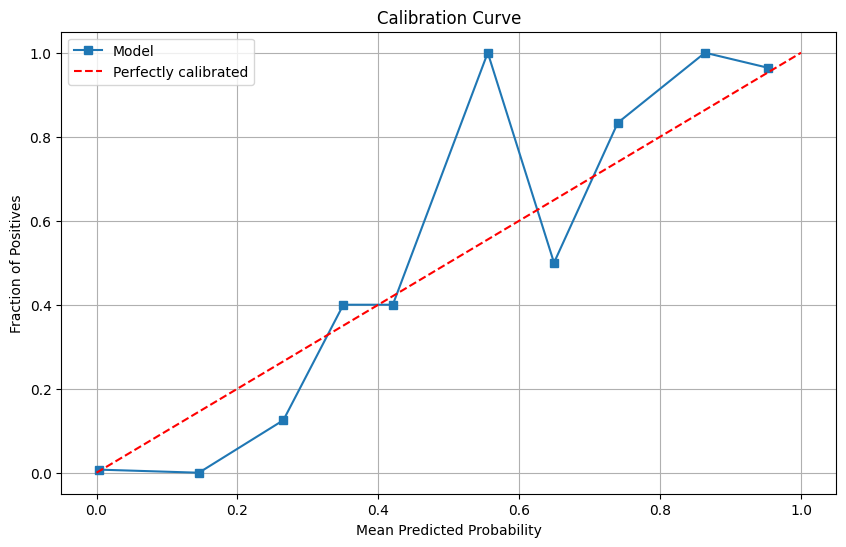

In [13]:
#LightGBM
LgbmBinClass = lgbm_binclass.LgbmBinClass
model = LgbmBinClass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

c:\Users\sulen\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:00:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Evaluation:

═══ Train Set Classification Report ═══
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      0.98      0.99       271

    accuracy                           1.00      8000
   macro avg       1.00      0.99      0.99      8000
weighted avg       1.00      1.00      1.00      8000



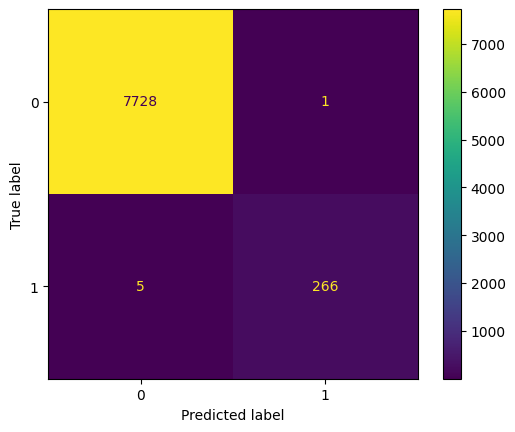


═══ Probability Metrics ═══
ROC AUC: 1.0000
Average Precision: 0.9999


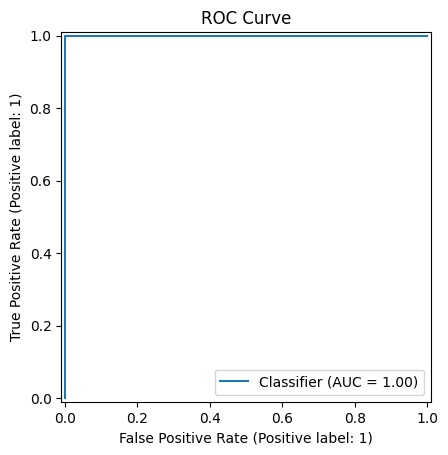

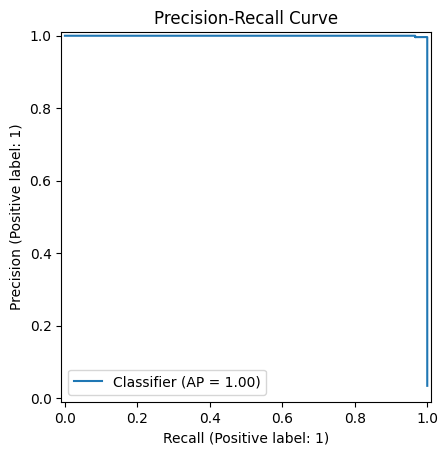

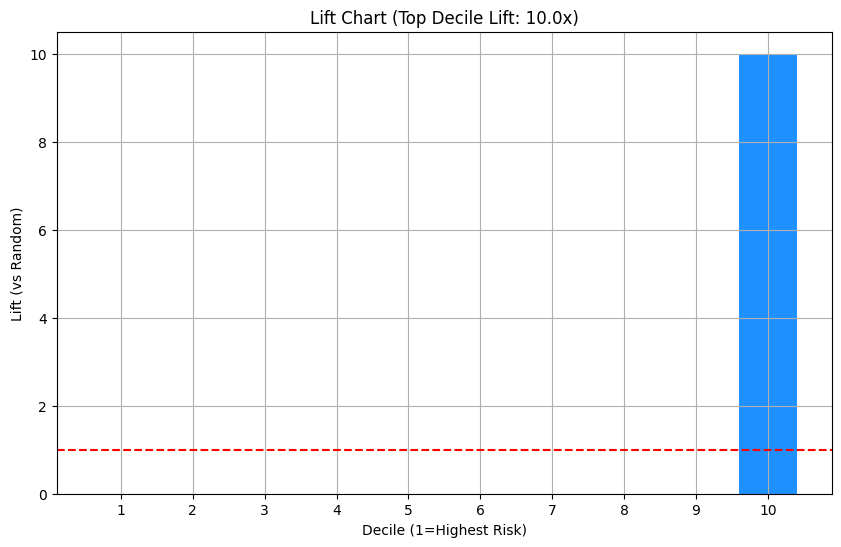

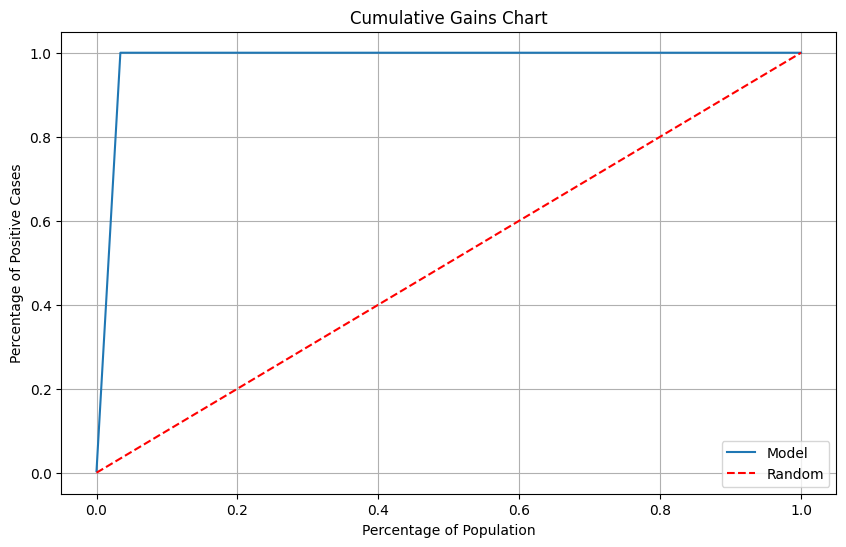

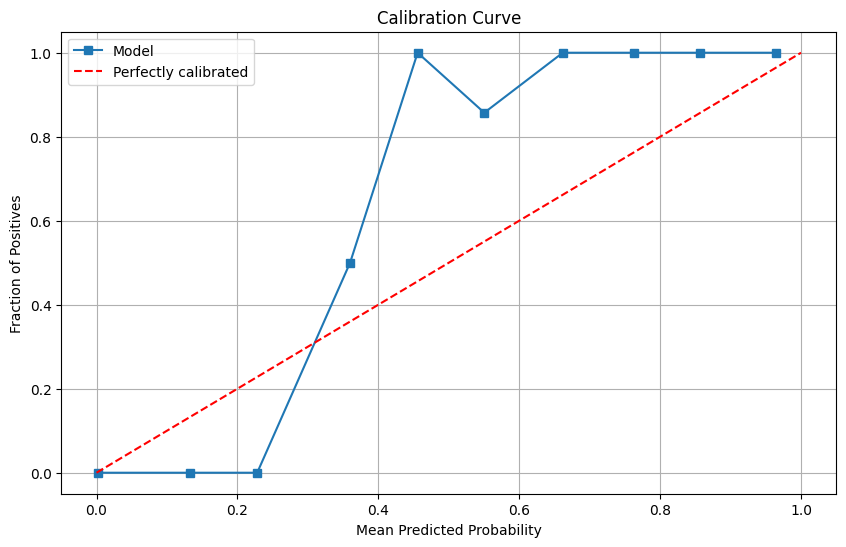


═══ Test Set Classification Report ═══
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.66      0.76        68

    accuracy                           0.99      2000
   macro avg       0.94      0.83      0.88      2000
weighted avg       0.99      0.99      0.98      2000



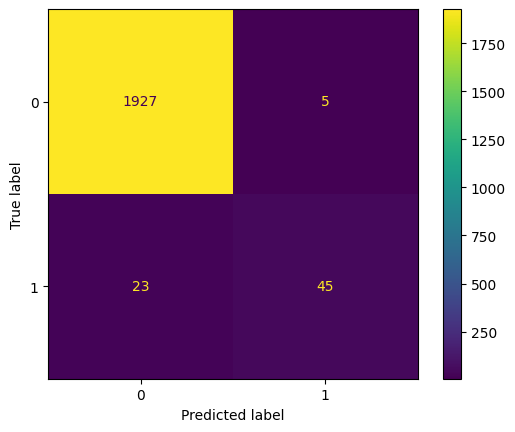


═══ Probability Metrics ═══
ROC AUC: 0.9709
Average Precision: 0.8230


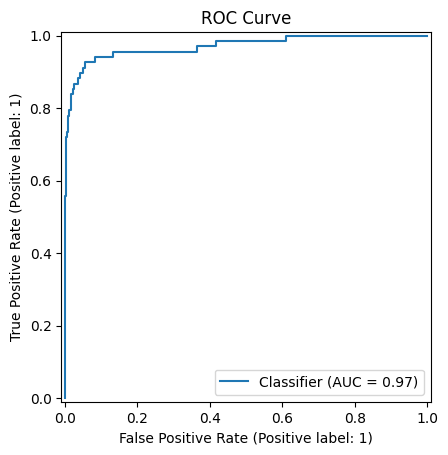

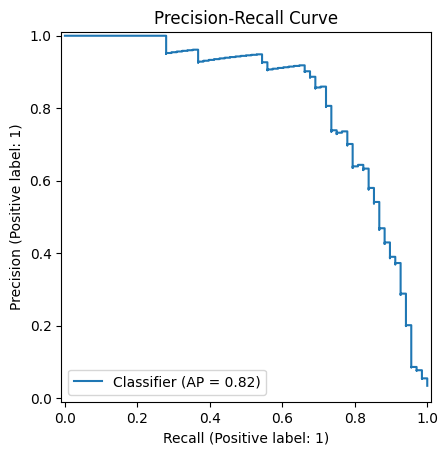

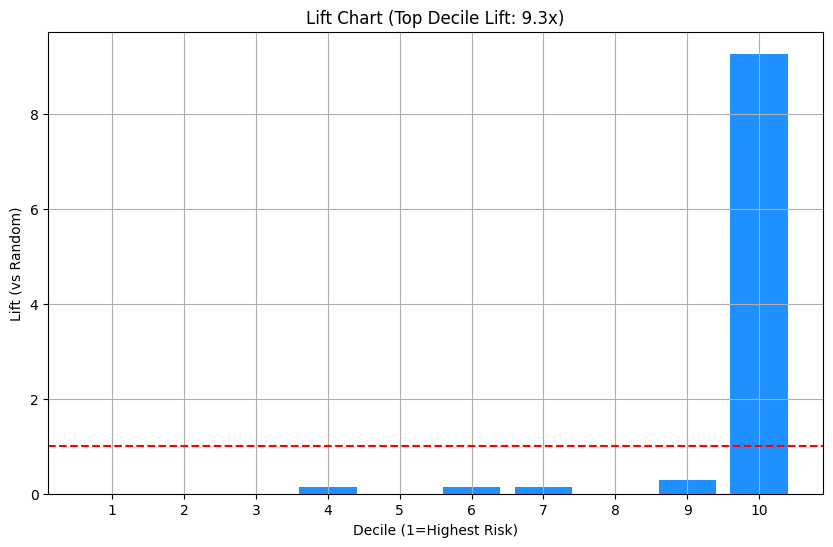

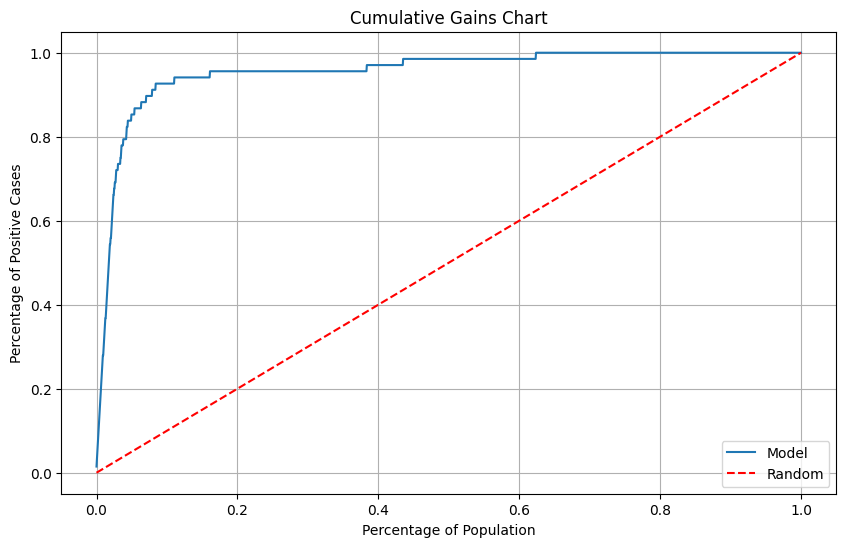

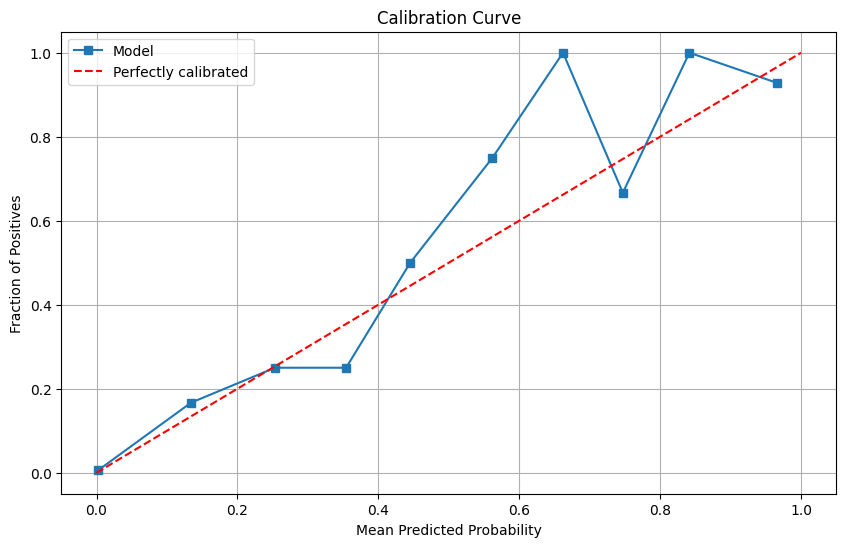

In [14]:
#XGBoost
XgboostBinclass = xgboost_binclass.XgboostBinclass
model = XgboostBinclass()
model.learn(df[df.dataset == 1], features, target)
df = model.apply(df)

print("Model Evaluation:")
model.evaluate(df)

###SHAP

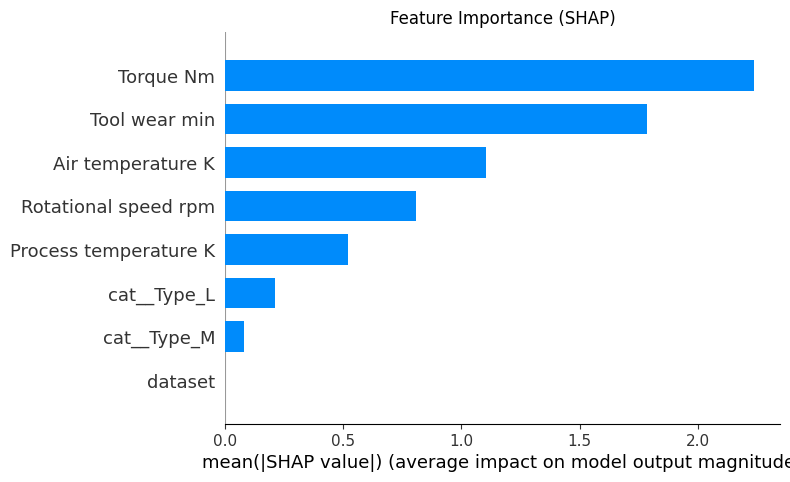

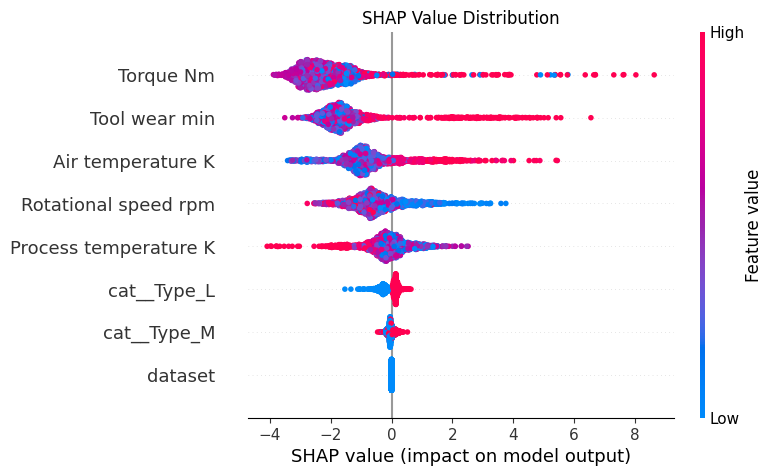

In [15]:
model.explain(df,top_n_features=10)

In [17]:
save_encoder(encoder_info, filepath="resources/info/encoder_info.joblib")
save_standardizer(stand_info, filepath="resources/info/stand_info.joblib")
model.save(filepath="resources/info/model_info.joblib")

Encoder saved to resources/info/encoder_info.joblib
Standardizer saved to resources/info/stand_info.joblib
Model saved to resources/info/model_info.joblib


In [ ]:
import joblib
import pandas as pd

pipeline = {
    'encoder_info': encoder_info,
    'stand_info': stand_info,
    'model_info': model_info,
    'metadata': {
        'features_used': list(df[features].columns),
        'target_column': target_col,
        'version': '1.0',
        'creation_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    }
}
joblib.dump(pipeline, "resources/info/pipeline.joblib")
print(f"Full pipeline saved")


Full pipeline saved
